<a href="https://colab.research.google.com/github/SuyashPatil-max/UIDAI_repo/blob/main/enroll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
# !unzip '/content/enroll_zip.zip'

In [216]:
palet =['#240750','#344C64','#577B8D','#57A6A1']

In [217]:
df = pd.read_csv('enroll.csv')
df.shape

(1006029, 7)

In [218]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.shape)

22957
(983072, 7)


In [219]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [220]:
df['state'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'The Dadra And Nagar Haveli And Daman And Diu',
       'Arunachal Pradesh', 'Himachal Pradesh', 'Goa',
       'Jammu And Kashmir', 'Dadra and Nagar Haveli and Daman and Diu',
       'Ladakh', 'Andaman and Nicobar Islands', 'Orissa', 'Pondicherry',
       'Puducherry', 'Lakshadweep', 'Andaman & Nicobar Islands',
       'Dadra & Nagar Haveli', 'Dadra and Nagar Haveli', 'Daman and Diu',
       'WEST BENGAL', 'Jammu & Kashmir', 'West  Bengal', '100000',
       'Daman & Diu', 'West Bangal', 'Westbengal', 'West bengal',
       'andhra pradesh', 'ODISHA', 'WESTBENGAL'], dtype=object)

In [221]:
df['state'] = df['state'].replace({
    'West Bengal' : 'WB',
    'WEST BENGAL' : 'WB',
    'West  Bengal' : 'WB',
    'West Bangal' : 'WB',
    'Westbengal' : 'WB',
    'West bengal' :'WB',
    'WESTBENGAL' :'WB',
    'Jammu and Kashmir' : 'J&K' ,
    'Jammu And Kashmir' : 'J&K',
    'Jammu & Kashmir' :'J&K',
    'Dadra and Nagar Haveli and Daman and Diu' : 'DnH_DnD',
    'Dadra & Nagar Haveli' : 'DnH_DnD' ,
    'Dadra and Nagar Haveli' : 'DnH_DnD',
    'Daman and Diu' : 'DnH_DnD',
    'The Dadra And Nagar Haveli And Daman And Diu' : 'DnH_DnD',
    'Daman & Diu' : 'DnH_DnD',
    'ODISHA' : 'Odisha',
    'Orissa' : 'Odisha',
    'Andaman & Nicobar Islands' : 'A&N_I' ,
    'Andaman and Nicobar Islands' : 'A&N_I' ,
})

In [222]:
df['state'] = df['state'].replace({
    'Karnataka' : 'KA',
    'Uttar Pradesh' : 'UP' ,
    'Maharashtra' : 'MH' ,
    'Tamil Nadu' : 'TN' ,
    'Andhra Pradesh' : 'AP',
    'andhra pradesh' : 'AP' ,
    'Madhya Pradesh' : 'MP' ,
    'Uttarakhand' : 'UK',
    'Chhattisgarh' : 'CG',
    'Jharkhand' : 'JK',
    'Pondicherry' : 'Puducherry',
    'Tamil Nadu' : 'TN',
    'Rajasthan' : 'RJ',
    'Himachal Pradesh' : 'HP'
})


In [223]:
print(df['state'].unique())
print(df['state'].unique().shape)

['Meghalaya' 'KA' 'UP' 'Bihar' 'MH' 'Haryana' 'RJ' 'Punjab' 'Delhi' 'MP'
 'WB' 'Assam' 'UK' 'Gujarat' 'AP' 'TN' 'CG' 'JK' 'Nagaland' 'Manipur'
 'Telangana' 'Tripura' 'Mizoram' 'J&K' 'Chandigarh' 'Sikkim' 'Odisha'
 'Kerala' 'DnH_DnD' 'Arunachal Pradesh' 'HP' 'Goa' 'Ladakh' 'A&N_I'
 'Puducherry' 'Lakshadweep' '100000']
(37,)


In [224]:
mask1 = df[df['state'] == '100000']
idx = mask1.index
idx

Index([ 23108,  46946,  97816, 115798, 153156, 160195, 261778, 272731, 470934,
       762744, 780936, 791621, 823985, 861631, 914457, 929221, 947831, 959114,
       968919, 976509, 988283],
      dtype='int64')

In [225]:
df = df.drop(idx)

In [226]:
df['state'].unique().shape

(36,)

In [227]:
pincode = df['pincode']
df = df.drop('pincode',axis= 1 )
df.head()

,date,state,district,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,11,61,37
1,09-03-2025,KA,Bengaluru Urban,14,33,39
2,09-03-2025,UP,Kanpur Nagar,29,82,12
3,09-03-2025,UP,Aligarh,62,29,15
4,09-03-2025,KA,Bengaluru Urban,14,16,21


In [228]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', dayfirst=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.drop(['date','day'],axis  =1 )

In [229]:
df['total_age'] = df['age_0_5'] + df['age_5_17'] +df['age_18_greater']
df.head()

,state,district,age_0_5,age_5_17,age_18_greater,year,month,total_age
0,Meghalaya,East Khasi Hills,11,61,37,2025,3,109
1,KA,Bengaluru Urban,14,33,39,2025,3,86
2,UP,Kanpur Nagar,29,82,12,2025,3,123
3,UP,Aligarh,62,29,15,2025,3,106
4,KA,Bengaluru Urban,14,16,21,2025,3,51


In [230]:
south = ['MH','KA','TN','AP','Telangana','Kerala','Gujarat','Goa']
terr = ['Delhi','A&N_I','Ladakh','Puducherry','DnH_DnD', 'Ladakh', 'Lakshadweep','Chandigarh']
sisters = [ 'Assam', 'Tripura','Manipur','Meghalaya','Arunachal Pradesh','Nagaland','Mizoram','Sikkim']
north = []
top_terr = south + terr + sisters
for i in df['state'].value_counts().index :
  if i in top_terr :
    pass
  else :
    north.append(i)

In [231]:
north

['UP',
 'WB',
 'Bihar',
 'RJ',
 'MP',
 'Odisha',
 'JK',
 'Punjab',
 'CG',
 'Haryana',
 'J&K',
 'HP',
 'UK']

In [232]:
south_mask = df['state'].isin(south)
terr_mask = df['state'].isin(terr)
sisters_mask = df['state'].isin(sisters)
north_mask = df['state'].isin(north)

In [233]:
df_south = df[south_mask]
df_north = df[north_mask]
df_sisters = df[sisters_mask]
df_terr = df[terr_mask]

In [234]:
df_south.head()

,state,district,age_0_5,age_5_17,age_18_greater,year,month,total_age
1,KA,Bengaluru Urban,14,33,39,2025,3,86
4,KA,Bengaluru Urban,14,16,21,2025,3,51
12,MH,Aurangabad,42,46,12,2025,3,100
16,KA,Bengaluru Urban,14,17,35,2025,3,66
18,KA,Bengaluru Urban,21,14,10,2025,3,45


/tmp/ipython-input-2276424992.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'age_0_5',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2276424992.py:3: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'age_0_5',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2276424992.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


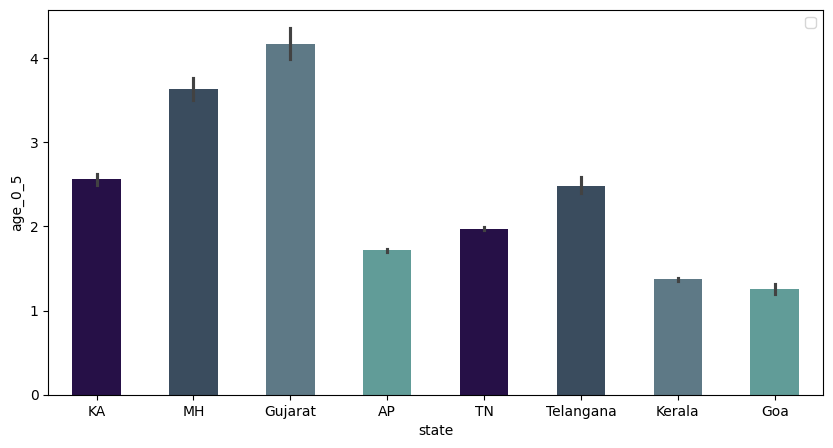

/tmp/ipython-input-2276424992.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'age_0_5',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2276424992.py:3: UserWarning: 
The palette list has fewer values (4) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'age_0_5',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2276424992.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


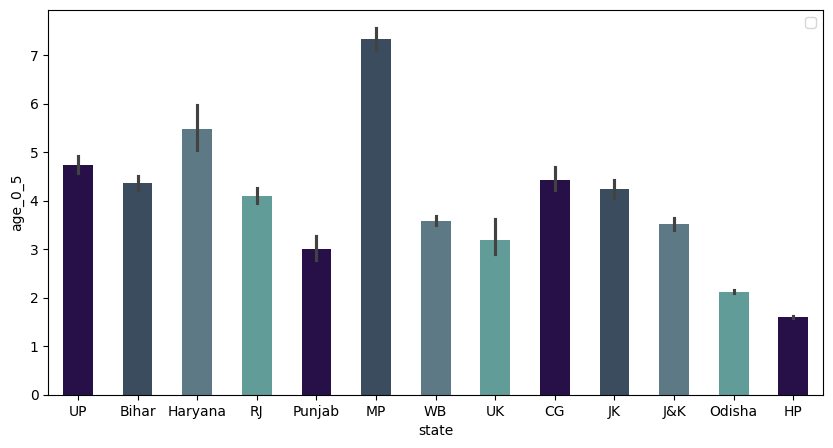

/tmp/ipython-input-2276424992.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'age_0_5',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2276424992.py:3: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'age_0_5',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2276424992.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


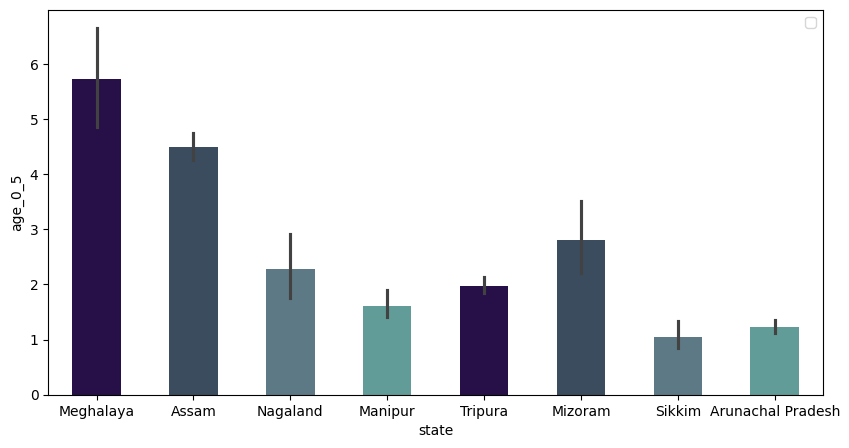

/tmp/ipython-input-2276424992.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y='age_0_5',data = df_terr,palette = palet,width=0.5)
/tmp/ipython-input-2276424992.py:8: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y='age_0_5',data = df_terr,palette = palet,width=0.5)
/tmp/ipython-input-2276424992.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


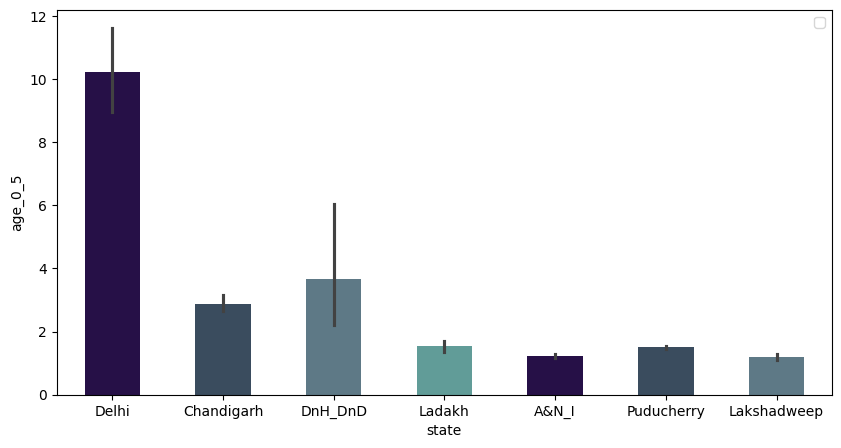

In [235]:
for X in df_south ,df_north ,df_sisters  :
  plt.figure(figsize=(10,5))
  sns.barplot(x = 'state', y= 'age_0_5',data = X ,palette =palet,width=0.5)
  plt.legend()
  plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x = 'state', y='age_0_5',data = df_terr,palette = palet,width=0.5)
plt.legend()
plt.show()

/tmp/ipython-input-878155999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-878155999.py:3: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-878155999.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


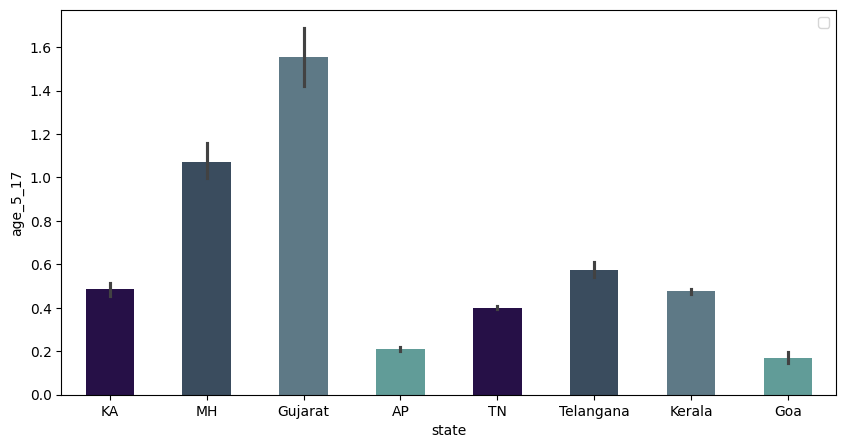

/tmp/ipython-input-878155999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-878155999.py:3: UserWarning: 
The palette list has fewer values (4) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-878155999.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


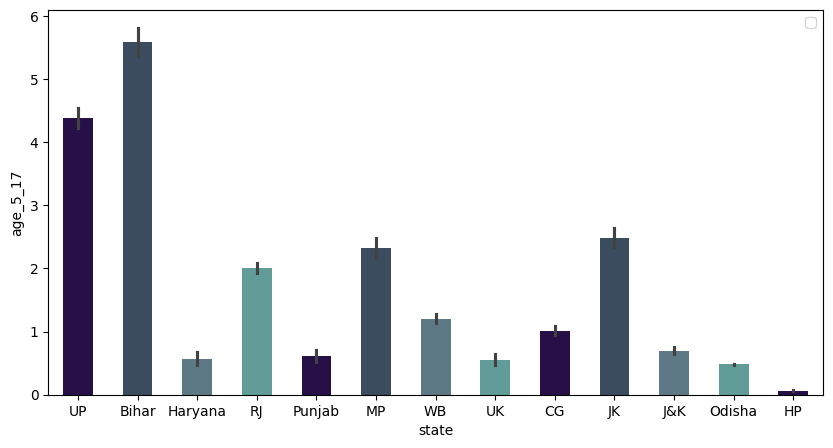

/tmp/ipython-input-878155999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-878155999.py:3: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-878155999.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


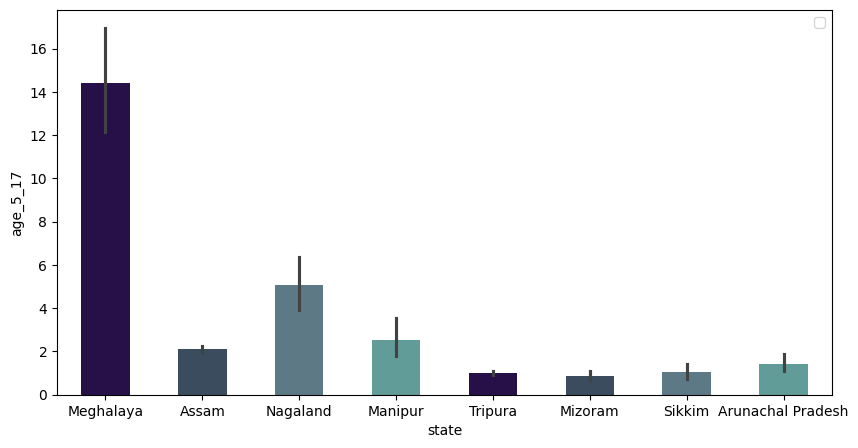

/tmp/ipython-input-878155999.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y='age_5_17',data = df_terr,palette = palet,width=0.5)
/tmp/ipython-input-878155999.py:8: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y='age_5_17',data = df_terr,palette = palet,width=0.5)
/tmp/ipython-input-878155999.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


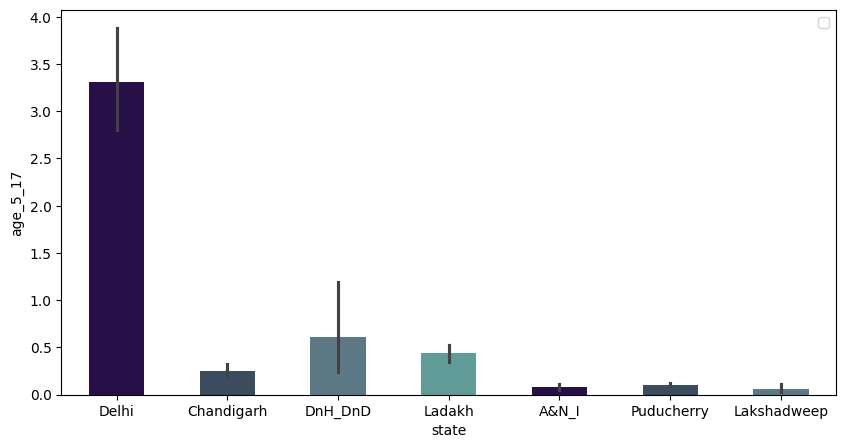

In [236]:
for X in df_south ,df_north ,df_sisters  :
  plt.figure(figsize=(10,5))
  sns.barplot(x = 'state', y= 'age_5_17',data = X ,palette =palet,width=0.5)
  plt.legend()
  plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x = 'state', y='age_5_17',data = df_terr,palette = palet,width=0.5)
plt.legend()
plt.show()

/tmp/ipython-input-1366493385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'age_18_greater',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1366493385.py:3: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'age_18_greater',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1366493385.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


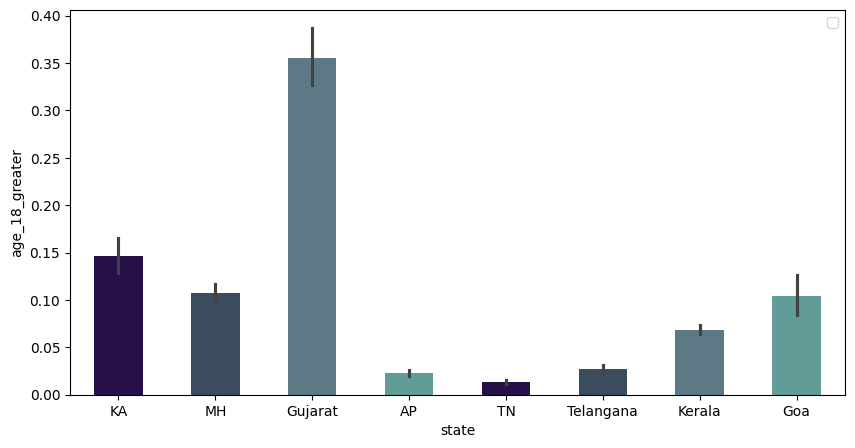

/tmp/ipython-input-1366493385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'age_18_greater',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1366493385.py:3: UserWarning: 
The palette list has fewer values (4) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'age_18_greater',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1366493385.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


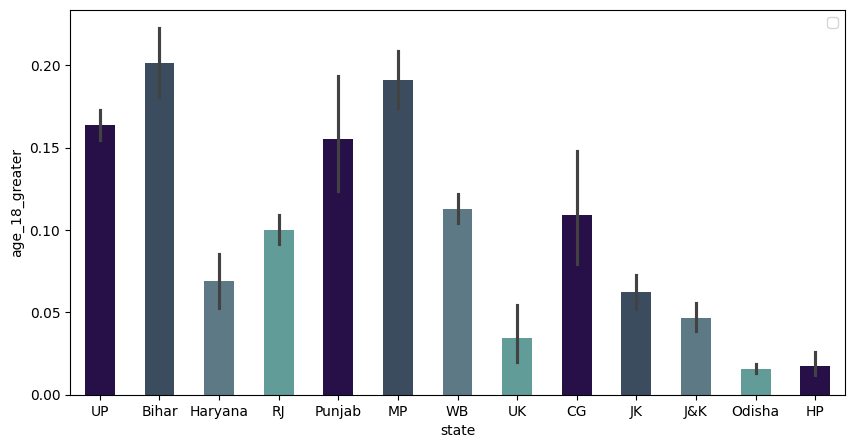

/tmp/ipython-input-1366493385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'age_18_greater',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1366493385.py:3: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'age_18_greater',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1366493385.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


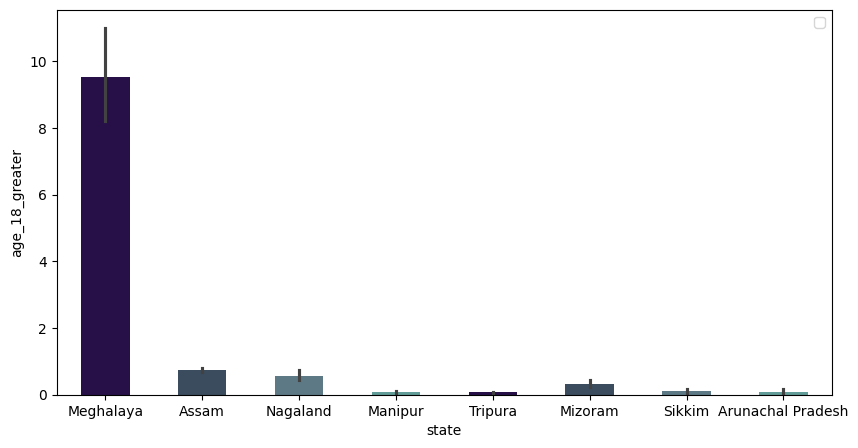

/tmp/ipython-input-1366493385.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y ='age_18_greater',data = df_terr,palette = palet,width=0.5)
/tmp/ipython-input-1366493385.py:8: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y ='age_18_greater',data = df_terr,palette = palet,width=0.5)
/tmp/ipython-input-1366493385.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


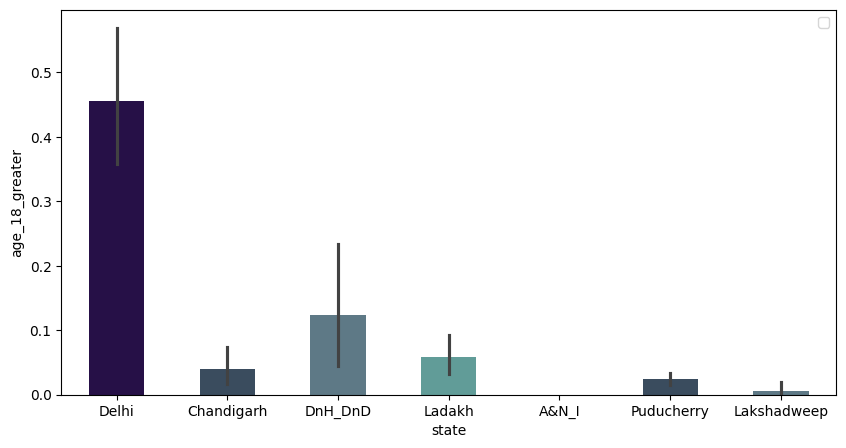

In [237]:
for X in df_south ,df_north ,df_sisters  :
  plt.figure(figsize=(10,5))
  sns.barplot(x = 'state', y= 'age_18_greater',data = X ,palette =palet,width=0.5)
  plt.legend()
  plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x = 'state', y ='age_18_greater',data = df_terr,palette = palet,width=0.5)
plt.legend()
plt.show()

In [238]:
df['regions'] = df['state']
df['regions'] = df['regions'].replace(south,'south_region')
df['regions'] = df['regions'].replace(sisters,'sisters_region')
df['regions'] = df['regions'].replace(terr,'territories_region')
df['regions'] = df['regions'].replace(north,'north_region')

In [239]:
df.head()

,state,district,age_0_5,age_5_17,age_18_greater,year,month,total_age,regions
0,Meghalaya,East Khasi Hills,11,61,37,2025,3,109,sisters_region
1,KA,Bengaluru Urban,14,33,39,2025,3,86,south_region
2,UP,Kanpur Nagar,29,82,12,2025,3,123,north_region
3,UP,Aligarh,62,29,15,2025,3,106,north_region
4,KA,Bengaluru Urban,14,16,21,2025,3,51,south_region


/tmp/ipython-input-1434876682.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'regions',y ='total_age',palette =palet,data =df )
/tmp/ipython-input-1434876682.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


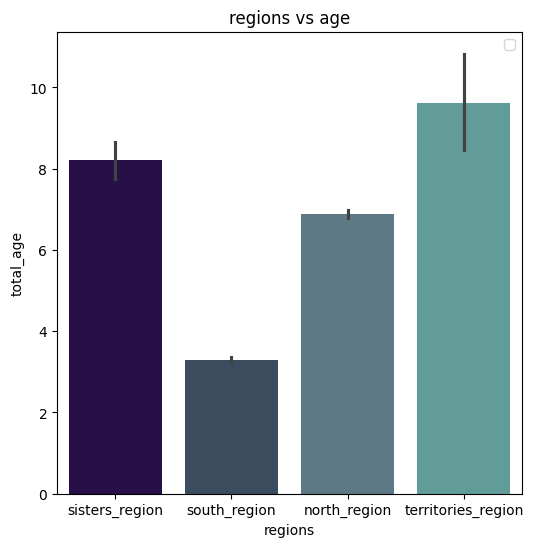

In [240]:
plt.figure(figsize=(6,6))
sns.barplot(x= 'regions',y ='total_age',palette =palet,data =df )
plt.legend()
plt.title('regions vs age')
plt.show()

In [241]:
df.head()

,state,district,age_0_5,age_5_17,age_18_greater,year,month,total_age,regions
0,Meghalaya,East Khasi Hills,11,61,37,2025,3,109,sisters_region
1,KA,Bengaluru Urban,14,33,39,2025,3,86,south_region
2,UP,Kanpur Nagar,29,82,12,2025,3,123,north_region
3,UP,Aligarh,62,29,15,2025,3,106,north_region
4,KA,Bengaluru Urban,14,16,21,2025,3,51,south_region


/tmp/ipython-input-2569234518.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'regions',y ='age_0_5',palette =palet,data =df )
/tmp/ipython-input-2569234518.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


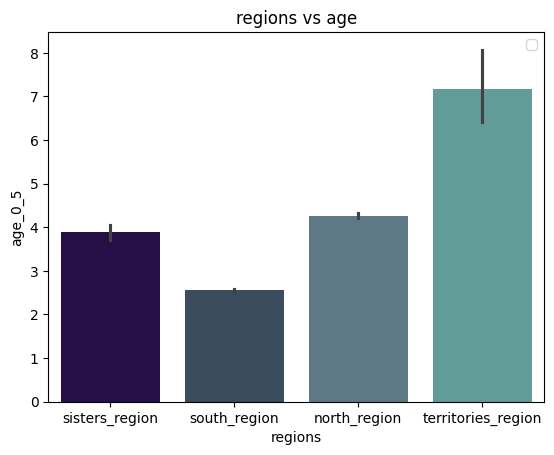

/tmp/ipython-input-2569234518.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'regions',y ='age_5_17',palette =palet,data =df )
/tmp/ipython-input-2569234518.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


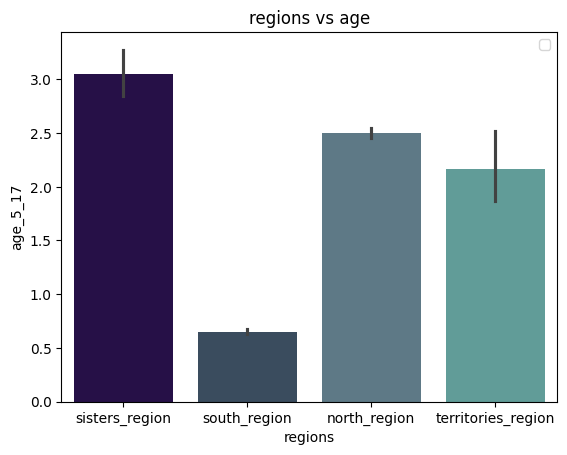

/tmp/ipython-input-2569234518.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'regions',y ='age_18_greater',palette =palet,data =df )
/tmp/ipython-input-2569234518.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


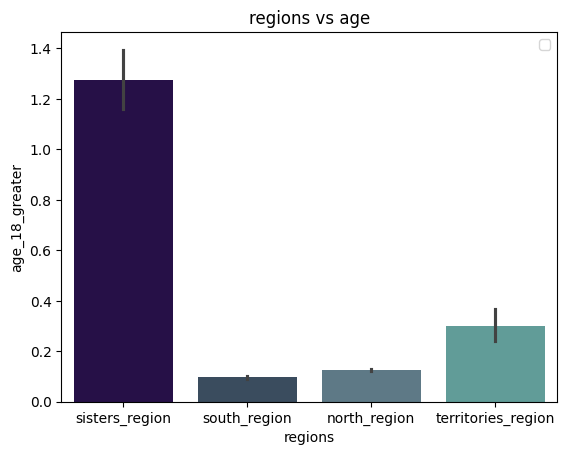

In [242]:
sns.barplot(x= 'regions',y ='age_0_5',palette =palet,data =df )
plt.legend()
plt.title('regions vs age')
plt.show()


sns.barplot(x= 'regions',y ='age_5_17',palette =palet,data =df )
plt.legend()
plt.title('regions vs age')
plt.show()

sns.barplot(x= 'regions',y ='age_18_greater',palette =palet,data =df )
plt.legend()
plt.title('regions vs age')
plt.show()

In [243]:
df['youth_ratio'] = (df['age_0_5']+df['age_5_17']) / df['age_18_greater']
df.head()

,state,district,age_0_5,age_5_17,age_18_greater,year,month,total_age,regions,youth_ratio
0,Meghalaya,East Khasi Hills,11,61,37,2025,3,109,sisters_region,1.945946
1,KA,Bengaluru Urban,14,33,39,2025,3,86,south_region,1.205128
2,UP,Kanpur Nagar,29,82,12,2025,3,123,north_region,9.250000
3,UP,Aligarh,62,29,15,2025,3,106,north_region,6.066667
4,KA,Bengaluru Urban,14,16,21,2025,3,51,south_region,1.428571


In [244]:
dist = df['district']
df = df.drop('district',axis=1)
df.head()

,state,age_0_5,age_5_17,age_18_greater,year,month,total_age,regions,youth_ratio
0,Meghalaya,11,61,37,2025,3,109,sisters_region,1.945946
1,KA,14,33,39,2025,3,86,south_region,1.205128
2,UP,29,82,12,2025,3,123,north_region,9.250000
3,UP,62,29,15,2025,3,106,north_region,6.066667
4,KA,14,16,21,2025,3,51,south_region,1.428571


/tmp/ipython-input-72102113.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'regions',y ='youth_ratio',palette =palet,data =df)
/tmp/ipython-input-72102113.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


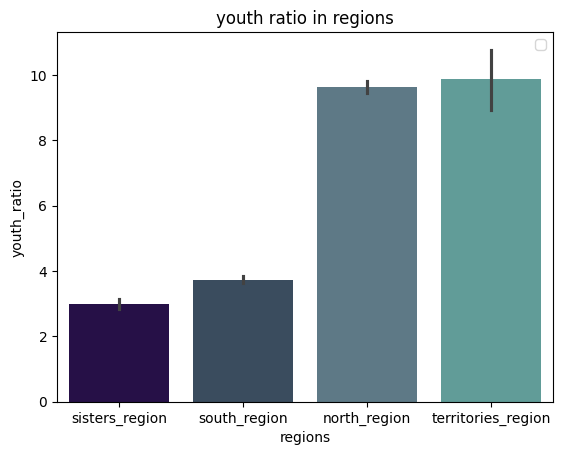

In [245]:
sns.barplot(x= 'regions',y ='youth_ratio',palette =palet,data =df)
plt.legend()
plt.title('youth ratio in regions')
plt.show()

/tmp/ipython-input-1469621211.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1469621211.py:4: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1469621211.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


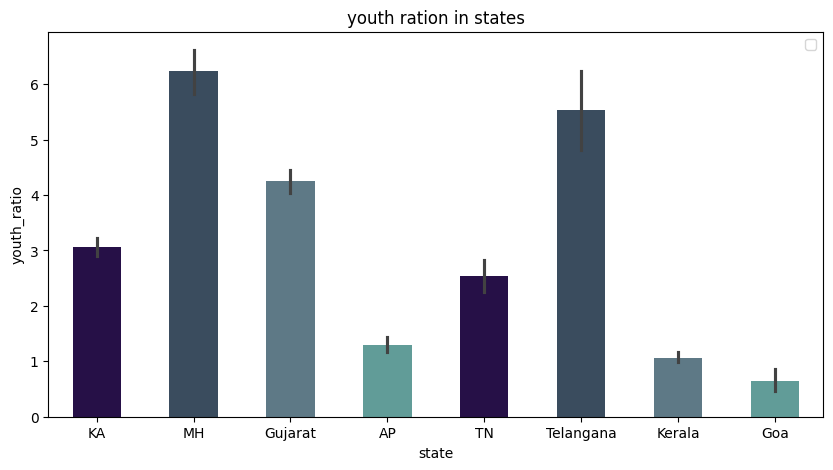

/tmp/ipython-input-1469621211.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1469621211.py:4: UserWarning: 
The palette list has fewer values (4) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1469621211.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


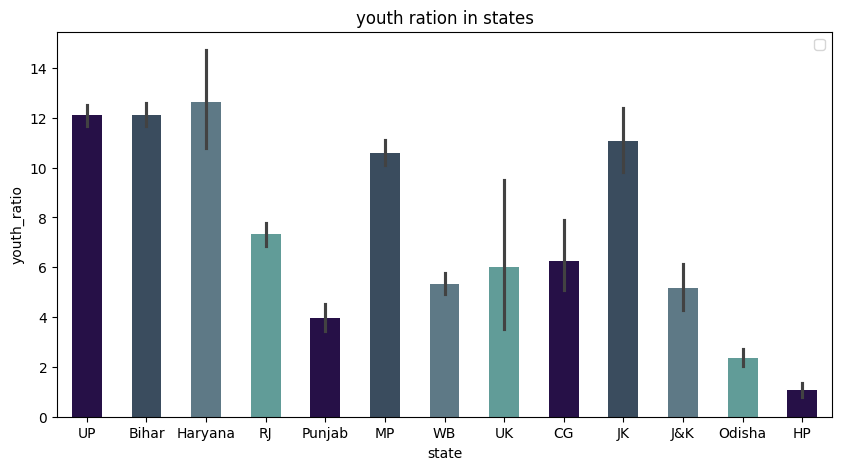

/tmp/ipython-input-1469621211.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1469621211.py:4: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1469621211.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


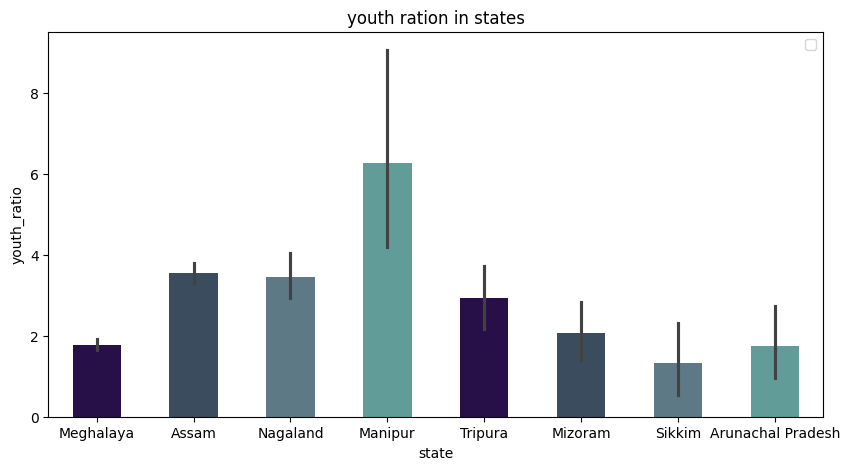

/tmp/ipython-input-1469621211.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'youth_ratio',data = df_terr,palette =palet,width=0.5)
/tmp/ipython-input-1469621211.py:11: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'youth_ratio',data = df_terr,palette =palet,width=0.5)
/tmp/ipython-input-1469621211.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


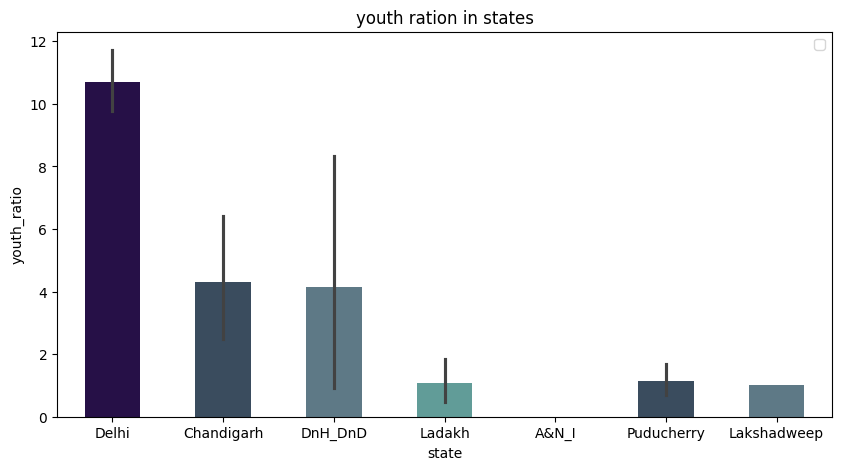

In [246]:
for X in df_south ,df_north ,df_sisters  :
  X['youth_ratio'] =(X['age_0_5']+df['age_5_17']) / X['age_18_greater']
  plt.figure(figsize=(10,5))
  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
  plt.title('youth ration in states')
  plt.legend()
  plt.show()

plt.figure(figsize=(10,5))
df_terr['youth_ratio'] = (df['age_0_5']+df['age_5_17']) / df['age_18_greater']
sns.barplot(x = 'state', y= 'youth_ratio',data = df_terr,palette =palet,width=0.5)
plt.title('youth ration in states')
plt.legend()
plt.show()

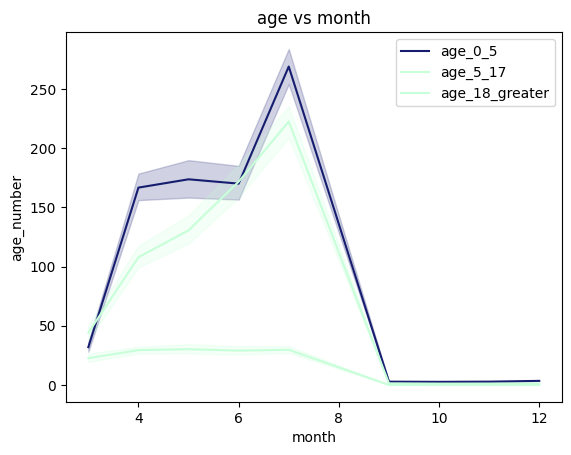

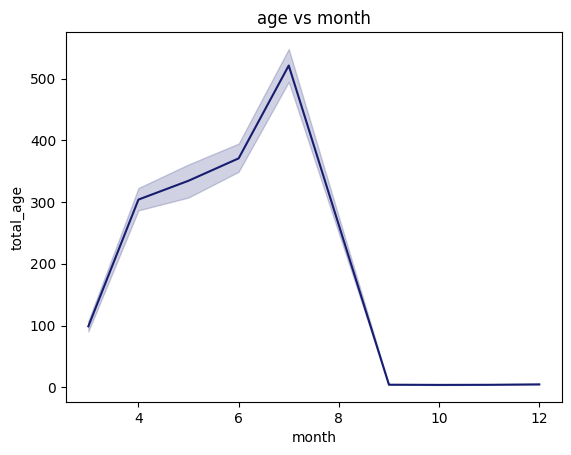

In [247]:
sns.lineplot(x='month',y = 'age_0_5',data =df ,color ='#161D6F',label='age_0_5')
sns.lineplot(x='month',y = 'age_5_17',data =df ,color ='#C7FFD8',label='age_5_17')
sns.lineplot(x='month',y = 'age_18_greater',data =df ,color ='#C7FFD8',label='age_18_greater')
plt.legend()
plt.title('age vs month')
plt.ylabel('age_number')
plt.xlabel('month')
plt.show()

sns.lineplot(x='month',y = 'total_age',data =df ,color ='#161D6F')
plt.title('age vs month')
plt.show()

/tmp/ipython-input-3831379694.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x= 'month',y ='total_age',palette =palet,data =df )
/tmp/ipython-input-3831379694.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


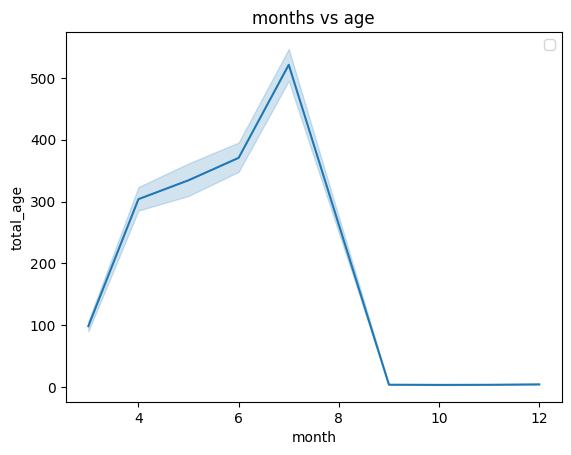

In [248]:
sns.lineplot(x= 'month',y ='total_age',palette =palet,data =df )
plt.legend()
plt.title('months vs age')
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/

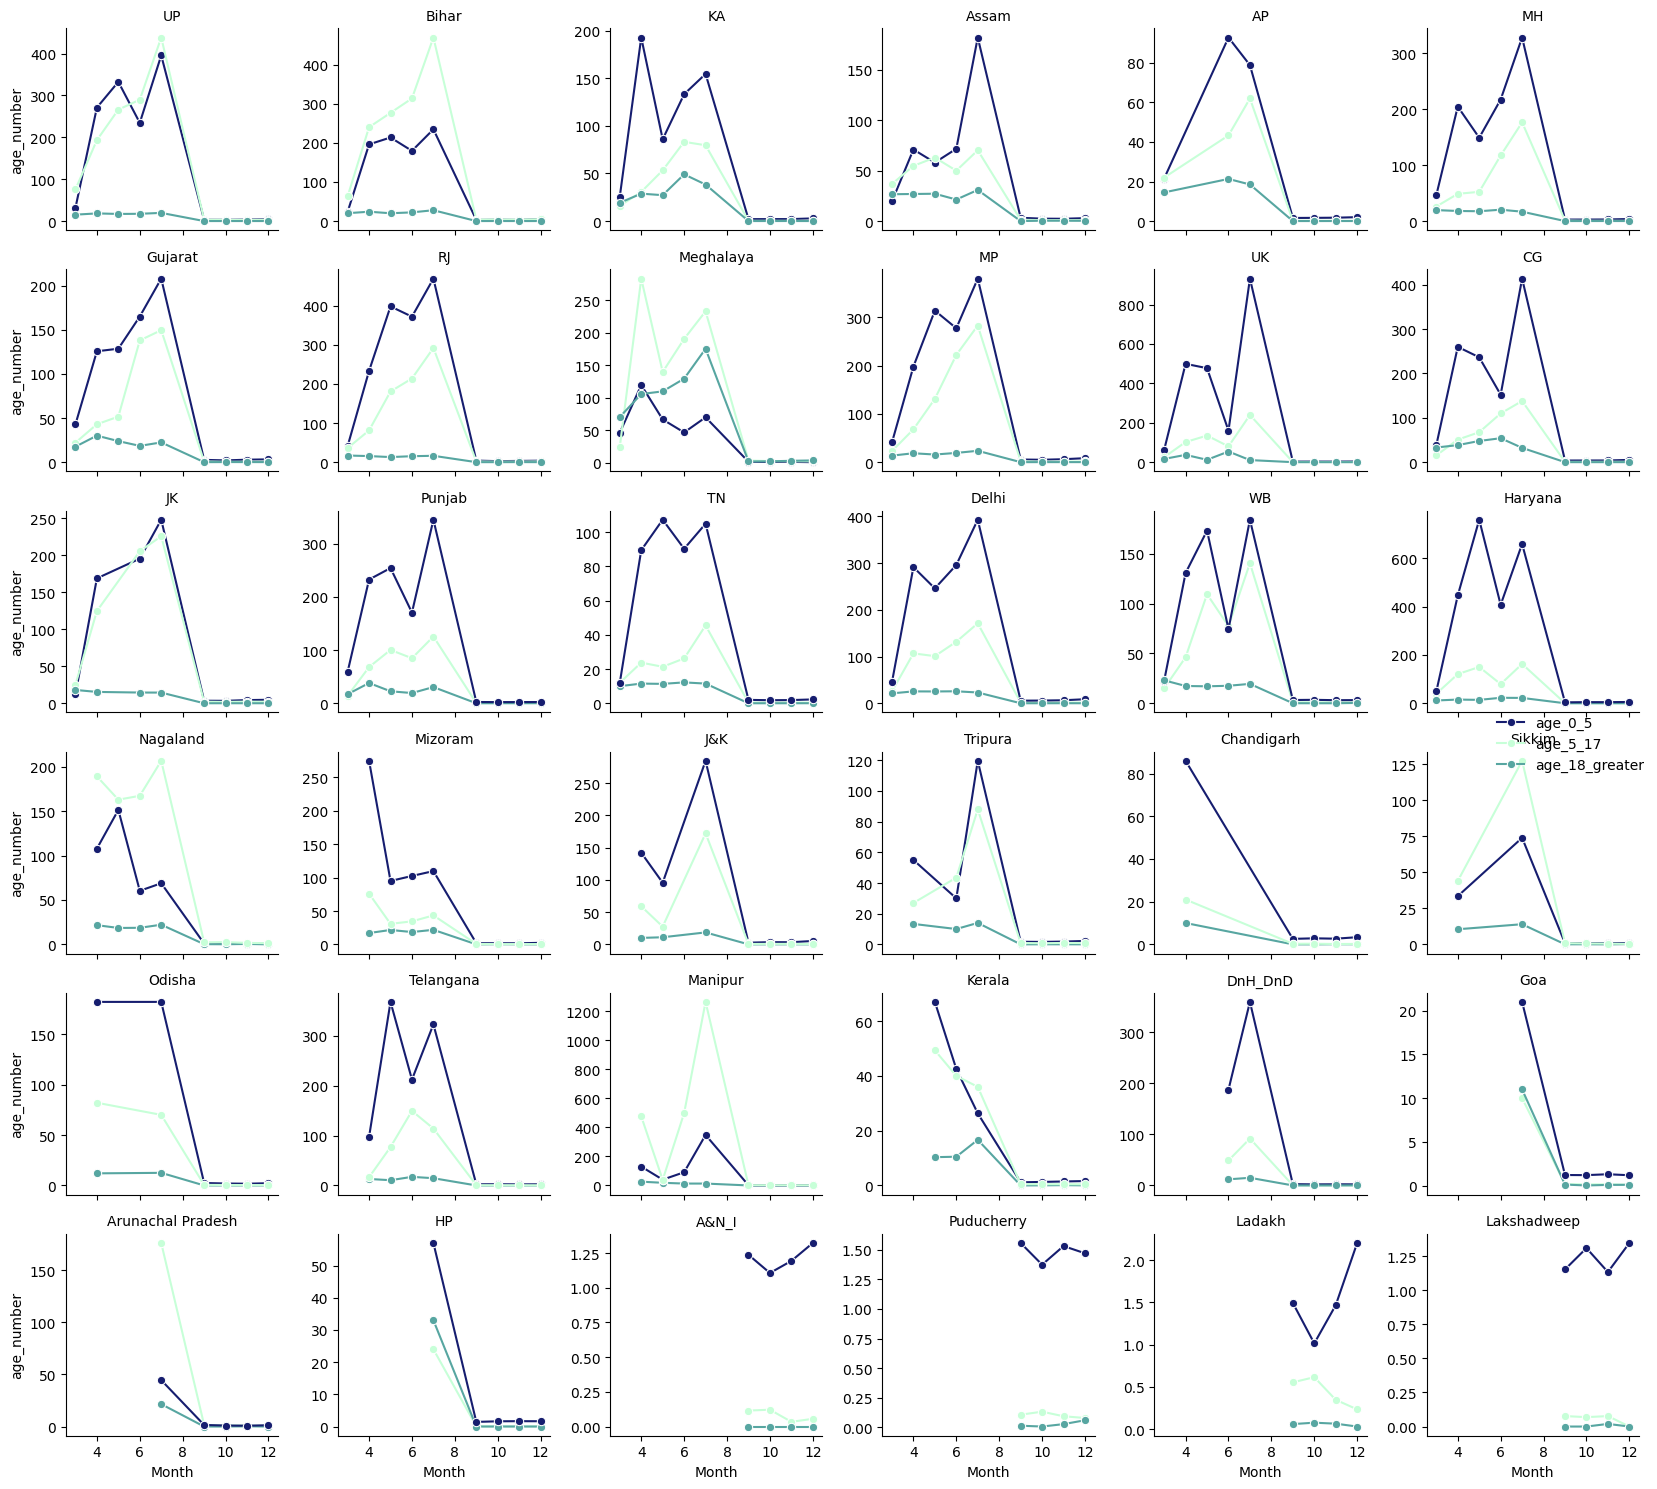

In [249]:
# df= df.reset_index()

df_long = df.melt(id_vars=['state', 'month'],value_vars=[ 'age_0_5','age_5_17','age_18_greater'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'age_0_5': '#161D6F','age_5_17': '#C7FFD8','age_18_greater':'#57A6A1'}
g = sns.FacetGrid(df_long,col='state',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.lineplot,x='month',y='enrolled',hue='age_group',marker='o',palette =palette,ci =None)

g.add_legend()
g.set_axis_labels('Month', 'age_number')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

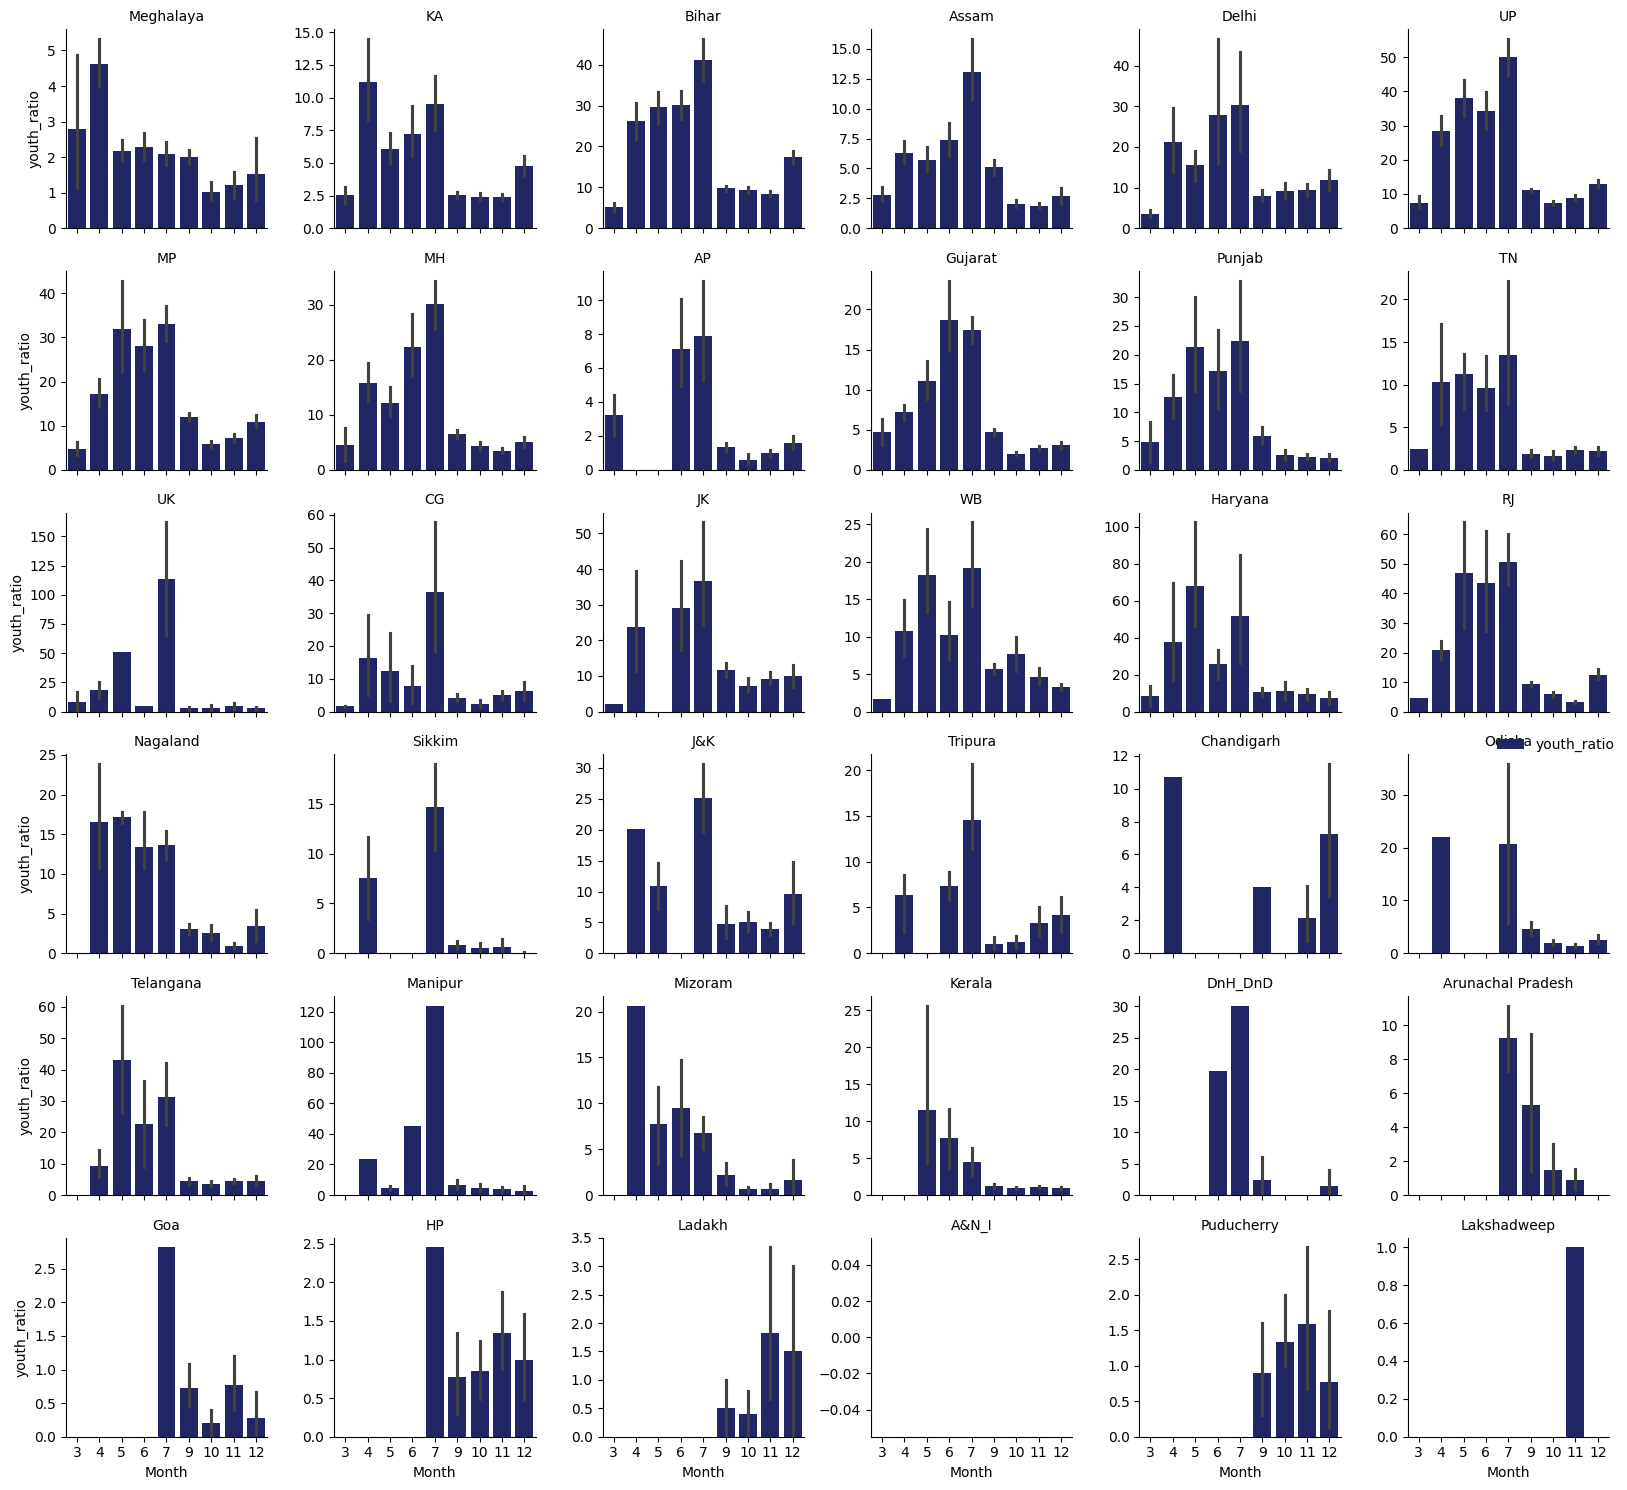

In [250]:
df= df.reset_index()

df_long = df.melt(id_vars=['state', 'month'],value_vars=[ 'youth_ratio'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'youth_ratio': '#161D6F'}
g = sns.FacetGrid(df_long,col='state',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.barplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'youth_ratio')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

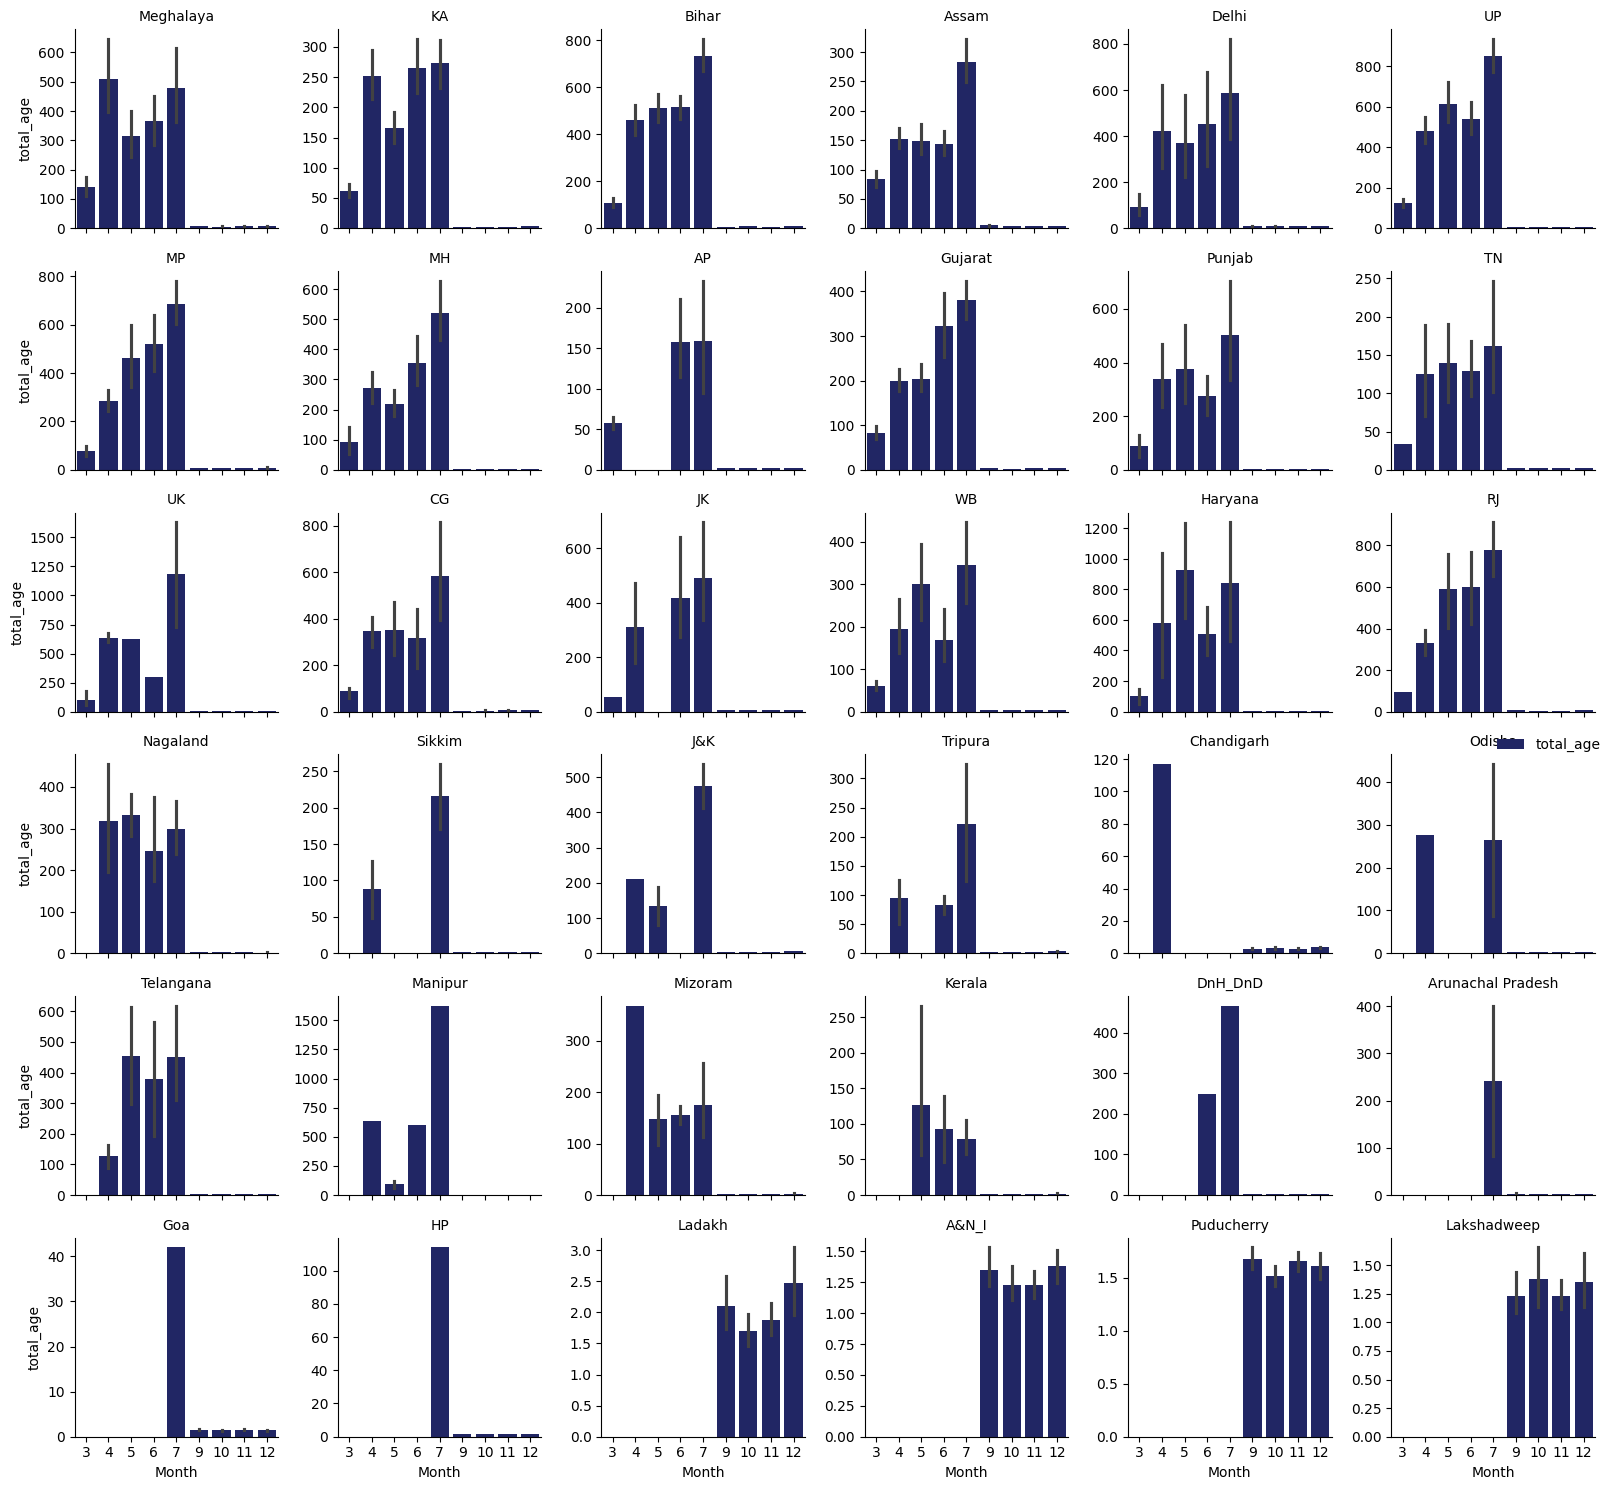

In [251]:
df_long = df.melt(id_vars=['state', 'month'],value_vars=[ 'total_age'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'total_age': '#161D6F'}
g = sns.FacetGrid(df_long,col='state',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.barplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'total_age')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

In [252]:
df.head()

,index,state,age_0_5,age_5_17,age_18_greater,year,month,total_age,regions,youth_ratio
0,0,Meghalaya,11,61,37,2025,3,109,sisters_region,1.945946
1,1,KA,14,33,39,2025,3,86,south_region,1.205128
2,2,UP,29,82,12,2025,3,123,north_region,9.250000
3,3,UP,62,29,15,2025,3,106,north_region,6.066667
4,4,KA,14,16,21,2025,3,51,south_region,1.428571


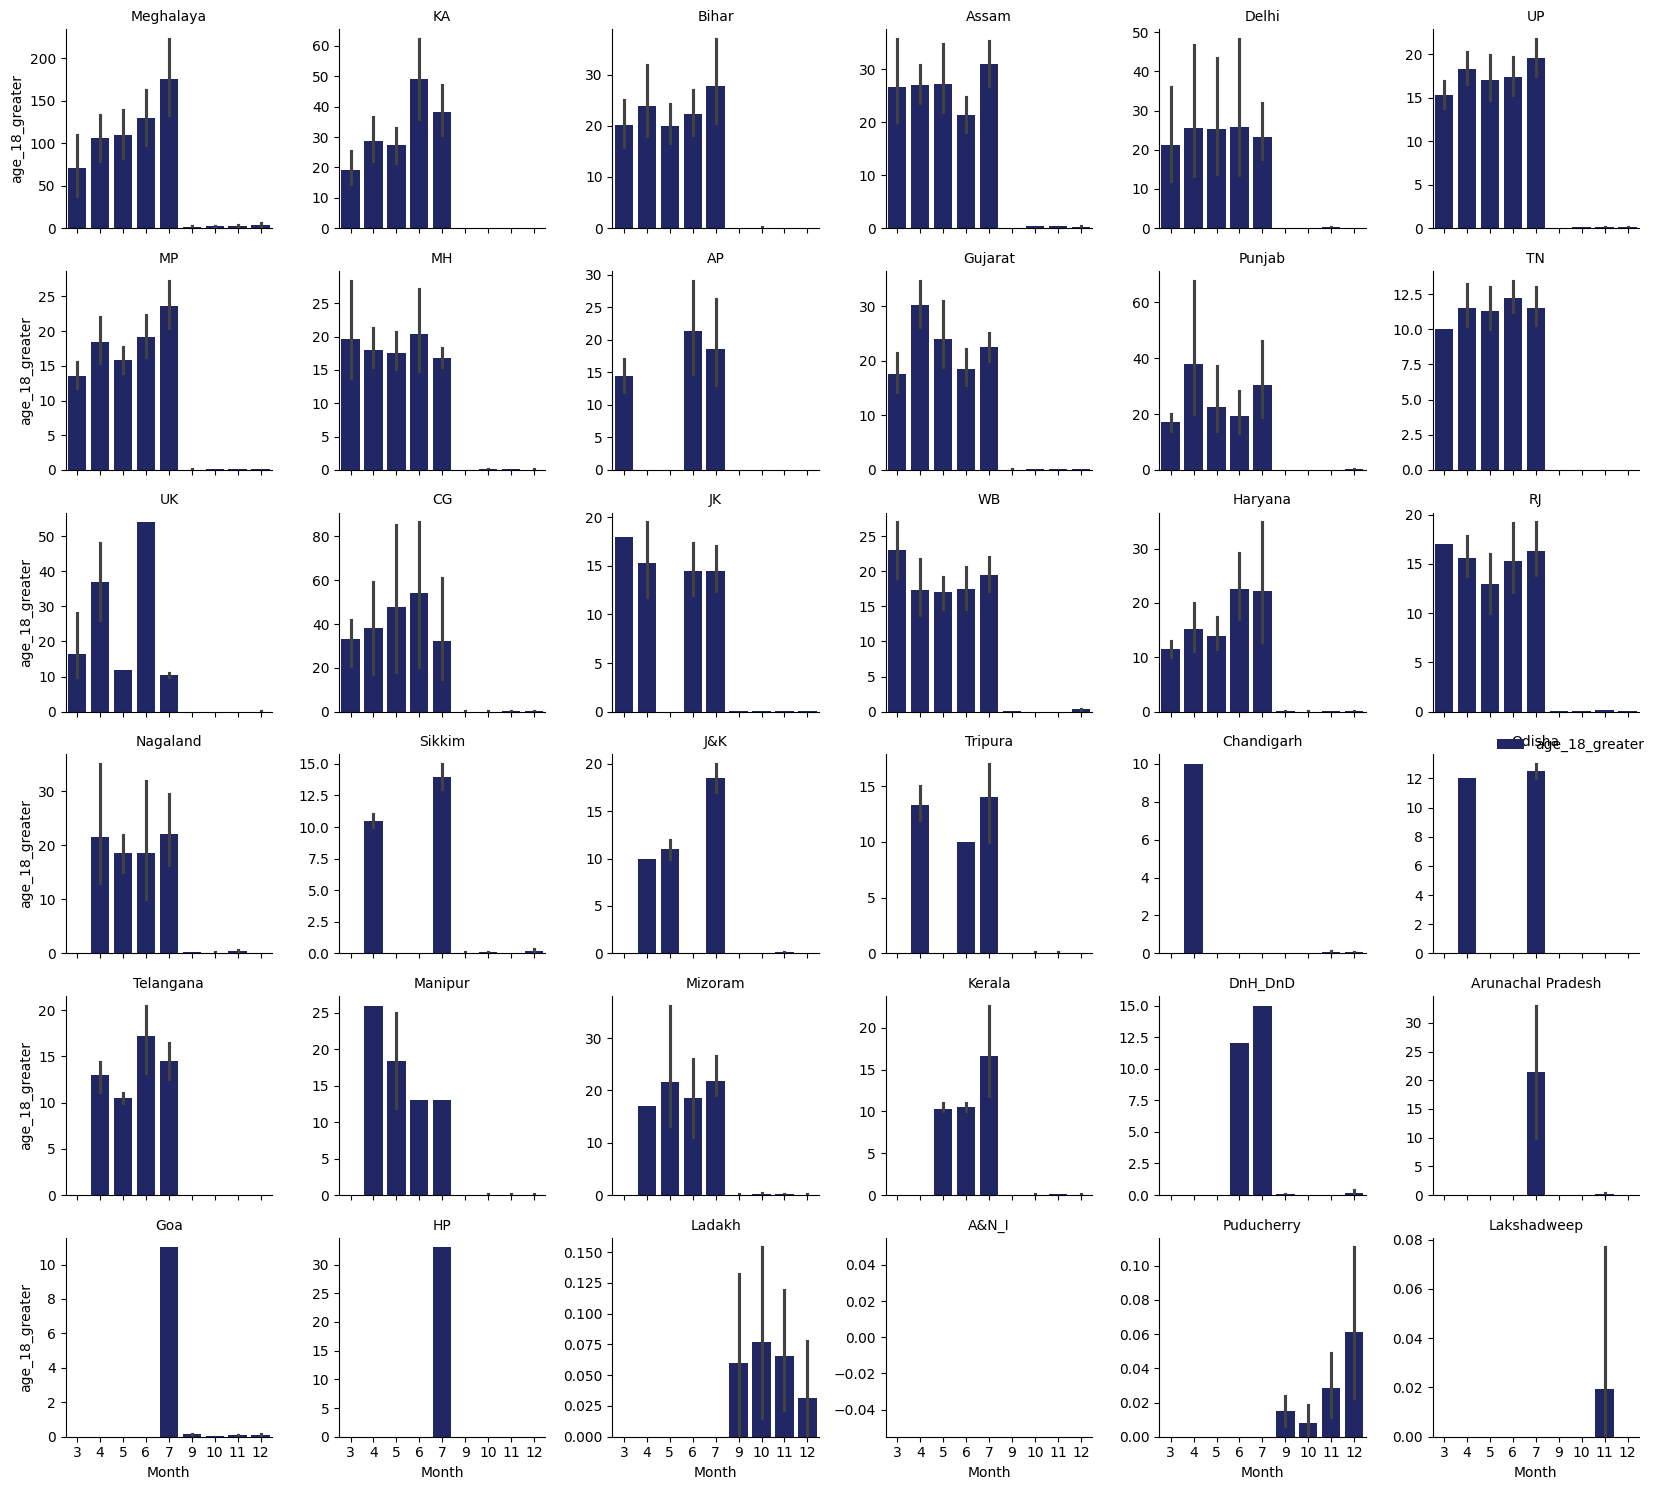

In [253]:
df_long = df.melt(id_vars=['state', 'month'],value_vars=[ 'age_18_greater'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'age_18_greater': '#161D6F'}
g = sns.FacetGrid(df_long,col='state',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.barplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'age_18_greater')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

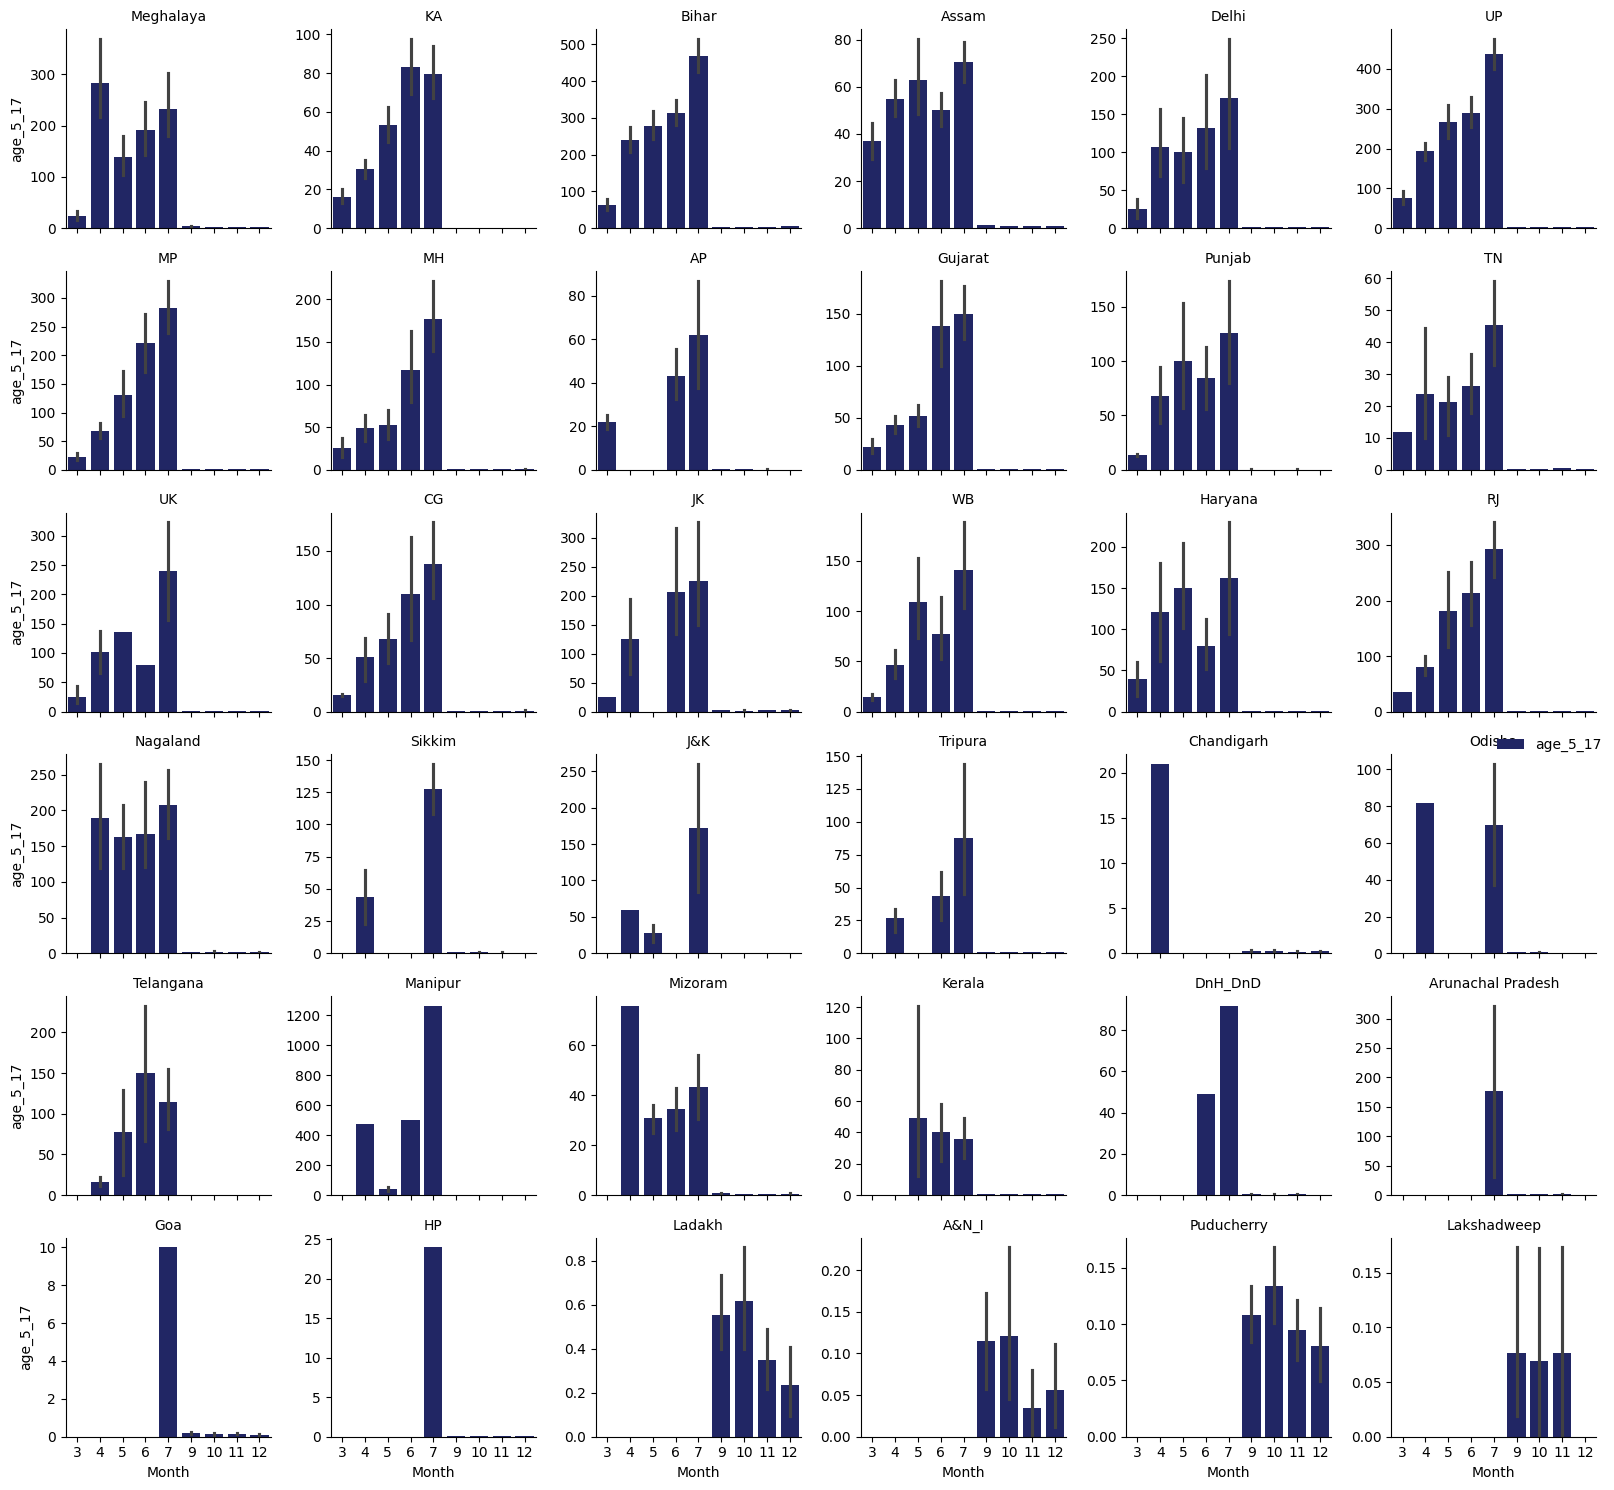

In [254]:
df_long = df.melt(id_vars=['state', 'month'],value_vars=[ 'age_5_17'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'age_5_17': '#161D6F'}
g = sns.FacetGrid(df_long,col='state',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.barplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'age_5_17')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

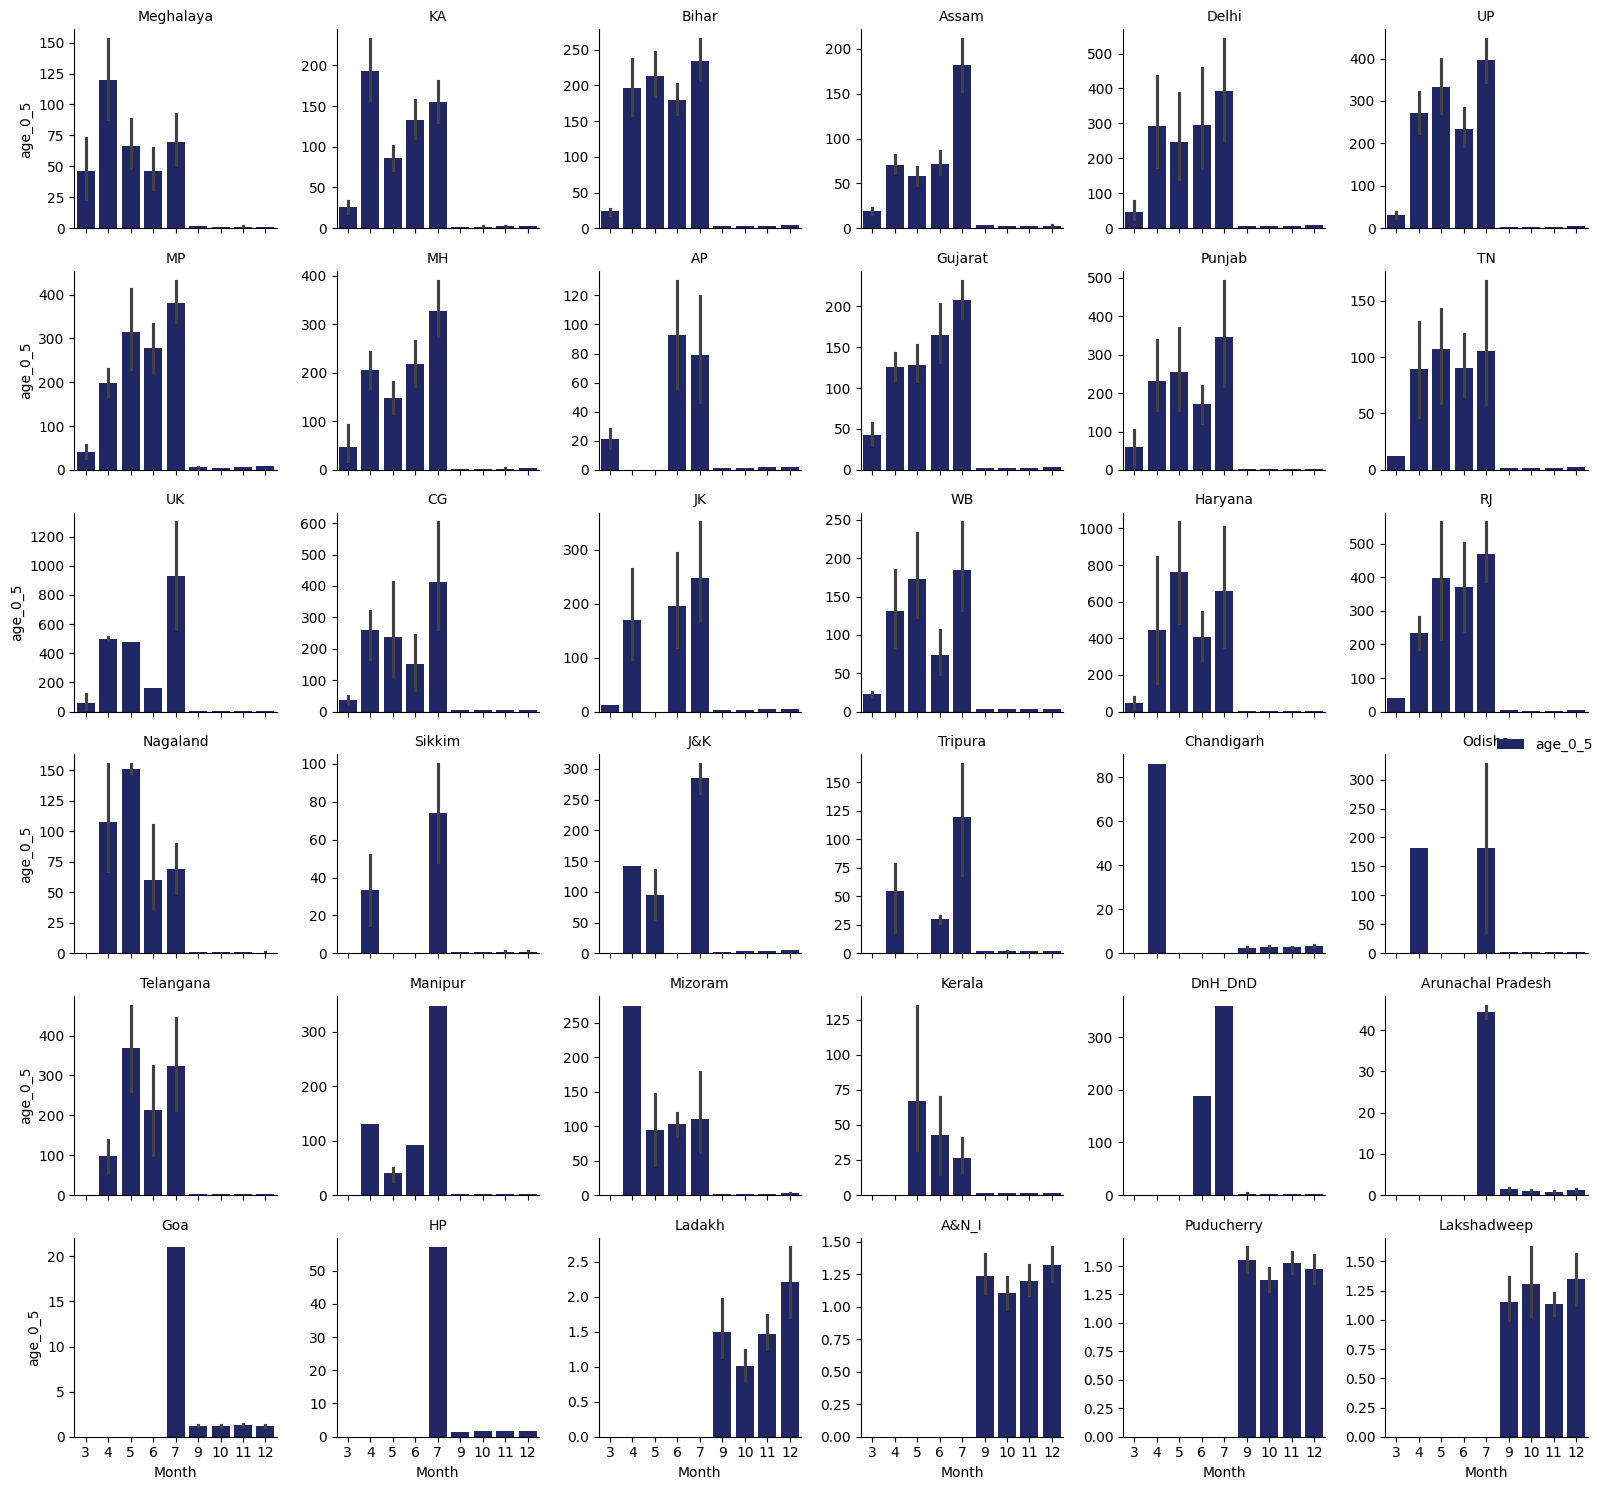

In [255]:
df_long = df.melt(id_vars=['state', 'month'],value_vars=[ 'age_0_5'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'age_0_5': '#161D6F'}
g = sns.FacetGrid(df_long,col='state',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.barplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'age_0_5')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

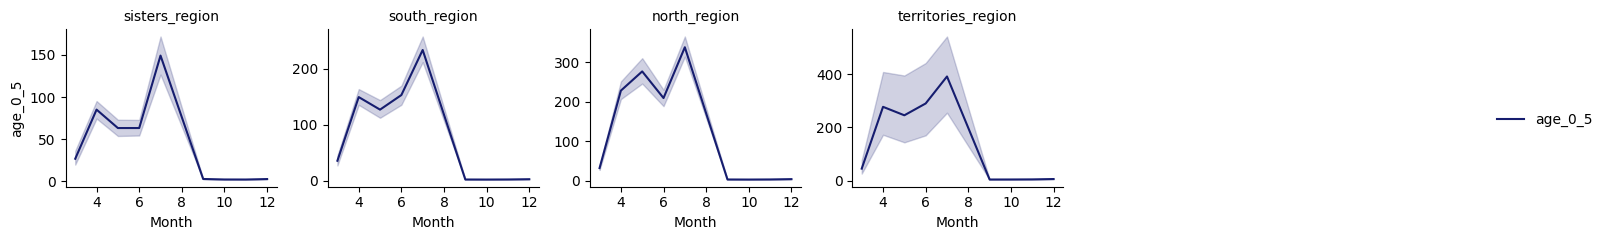

In [256]:
df_long = df.melt(id_vars=['regions', 'month'],value_vars=[ 'age_0_5'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'age_0_5': '#161D6F'}
g = sns.FacetGrid(df_long,col='regions',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.lineplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'age_0_5')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

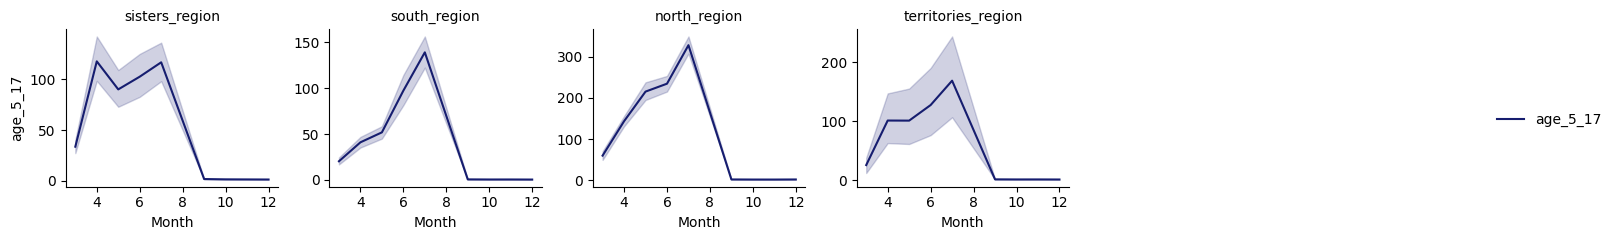

In [257]:
df_long = df.melt(id_vars=['regions', 'month'],value_vars=[ 'age_5_17'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'age_5_17': '#161D6F'}
g = sns.FacetGrid(df_long,col='regions',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.lineplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'age_5_17')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

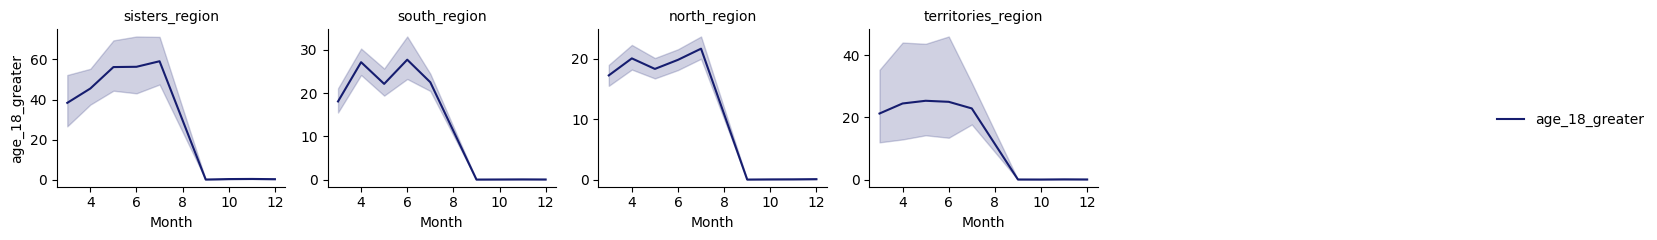

In [258]:
df_long = df.melt(id_vars=['regions', 'month'],value_vars=[ 'age_18_greater'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'age_18_greater': '#161D6F'}
g = sns.FacetGrid(df_long,col='regions',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.lineplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'age_18_greater')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

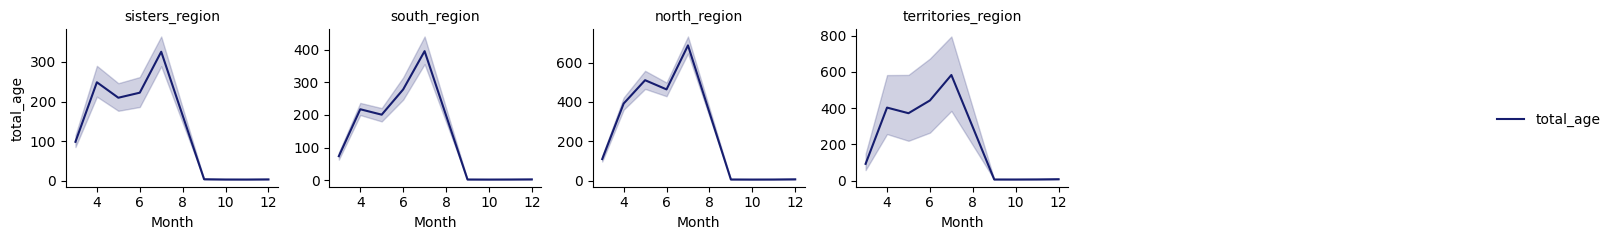

In [259]:
df_long = df.melt(id_vars=['regions', 'month'],value_vars=[ 'total_age'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'total_age': '#161D6F'}
g = sns.FacetGrid(df_long,col='regions',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.lineplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'total_age')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

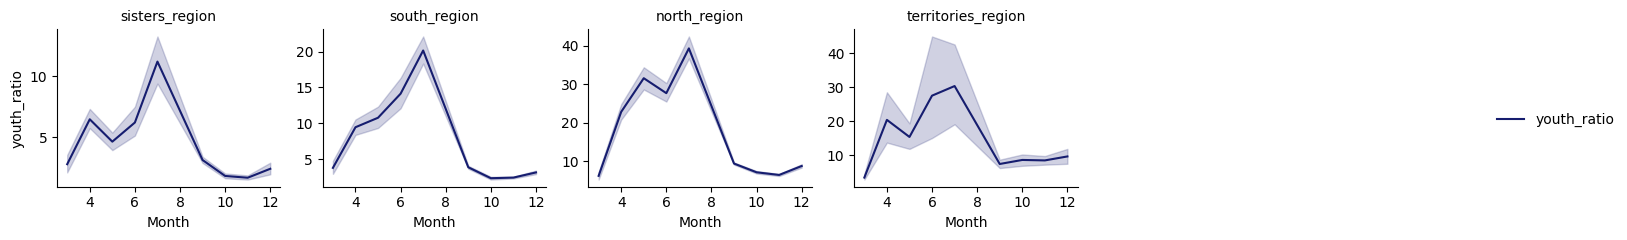

In [260]:
df_long = df.melt(id_vars=['regions', 'month'],value_vars=[ 'youth_ratio'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'youth_ratio': '#161D6F'}
g = sns.FacetGrid(df_long,col='regions',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.lineplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'youth_ratio')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

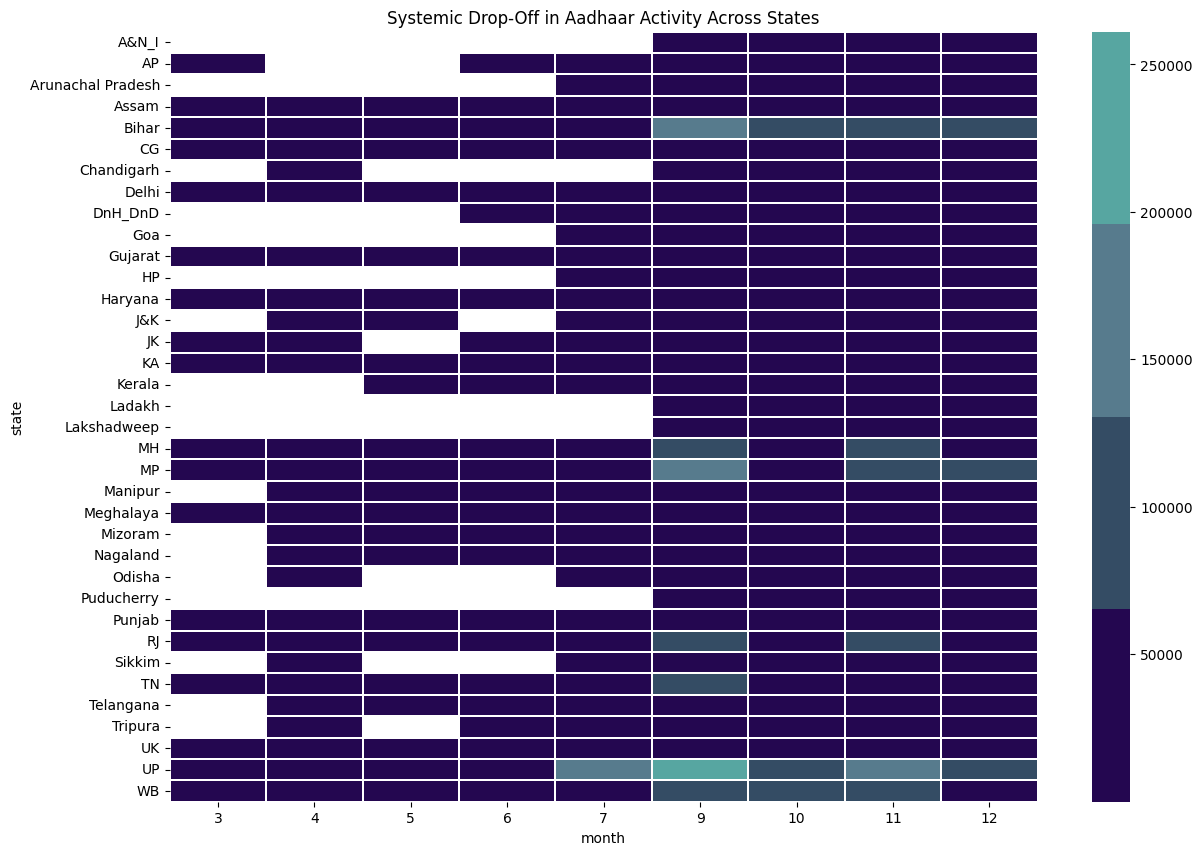

In [261]:
pivot = df.pivot_table( values='total_age', index='state', columns='month', aggfunc='sum')

plt.figure(figsize=(14,10))
sns.heatmap(pivot, cmap = palet, linewidths=0.2)
plt.title("Systemic Drop-Off in Aadhaar Activity Across States")
plt.show()


/tmp/ipython-input-233585519.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y='youth_roll_std', hue='state', legend=False,palette = palet,ci= None )
/tmp/ipython-input-233585519.py:10: UserWarning: 
The palette list has fewer values (4) than needed (36) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='month', y='youth_roll_std', hue='state', legend=False,palette = palet,ci= None )


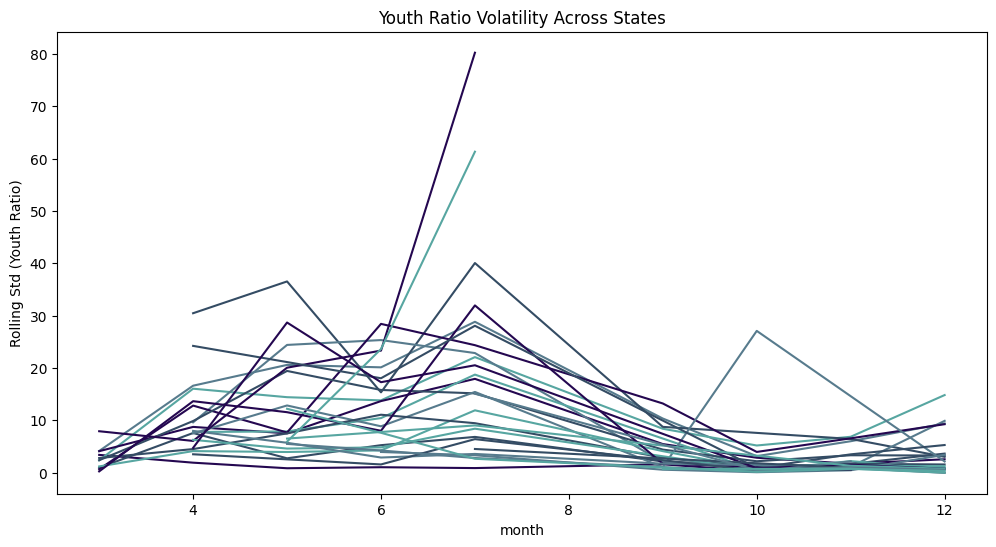

In [262]:
df = df[df['total_age'] > 0]

df['youth_roll_std'] = (
    df.groupby('state')['youth_ratio']
      .rolling(3).std()
      .reset_index(level=0, drop=True)
)

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='month', y='youth_roll_std', hue='state', legend=False,palette = palet,ci= None )
plt.title("Youth Ratio Volatility Across States")
plt.ylabel("Rolling Std (Youth Ratio)")
plt.show()


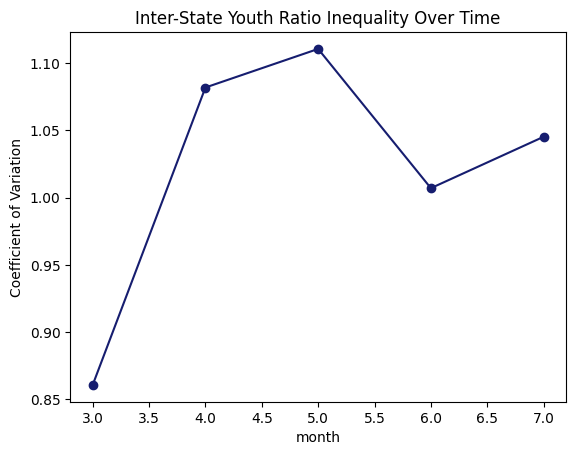

In [263]:
cv_month = df.groupby('month')['youth_ratio'].std() / \
           df.groupby('month')['youth_ratio'].mean()

cv_month.plot(marker='o' ,color = '#161D6F')
plt.title("Inter-State Youth Ratio Inequality Over Time")
plt.ylabel("Coefficient of Variation")
plt.show()


In [264]:
df.head()

,index,state,age_0_5,age_5_17,age_18_greater,year,month,total_age,regions,youth_ratio,youth_roll_std
0,0,Meghalaya,11,61,37,2025,3,109,sisters_region,1.945946,NaN
1,1,KA,14,33,39,2025,3,86,south_region,1.205128,NaN
2,2,UP,29,82,12,2025,3,123,north_region,9.250000,NaN
3,3,UP,62,29,15,2025,3,106,north_region,6.066667,NaN
4,4,KA,14,16,21,2025,3,51,south_region,1.428571,NaN


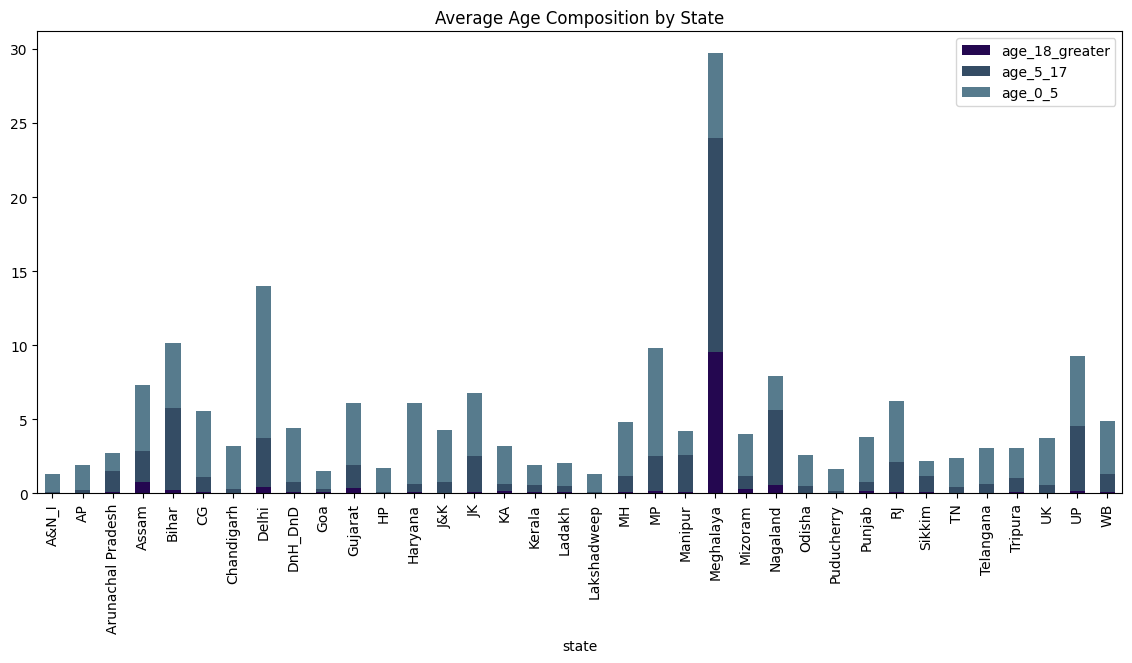

In [265]:
state_avg = df.groupby('state')[['age_18_greater','age_5_17','age_0_5']].mean()

state_avg.plot(kind='bar',stacked=True,figsize=(14,6) ,color =palet)
plt.title("Average Age Composition by State")
plt.show()


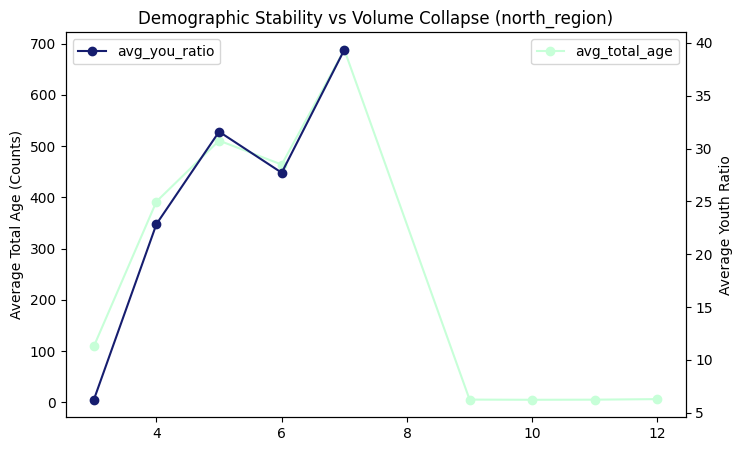

In [266]:
region_month = df.groupby(['regions','month']).agg(
    avg_total_age=('total_age','mean'),
    avg_youth_ratio=('youth_ratio','mean')
).reset_index()

region = 'north_region'
temp = region_month[region_month['regions'] == region]

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.plot(temp['month'], temp['avg_total_age'], marker='o',color ='#C7FFD8',label = 'avg_total_age')
ax1.set_ylabel("Average Total Age (Counts)")
plt.legend()

ax2 = ax1.twinx()
ax2.plot(temp['month'], temp['avg_youth_ratio'], marker='o',color ='#161D6F',label='avg_you_ratio')
ax2.set_ylabel("Average Youth Ratio")
plt.legend(loc='upper left',ncol =1 )


plt.title(f"Demographic Stability vs Volume Collapse ({region})")
plt.show()


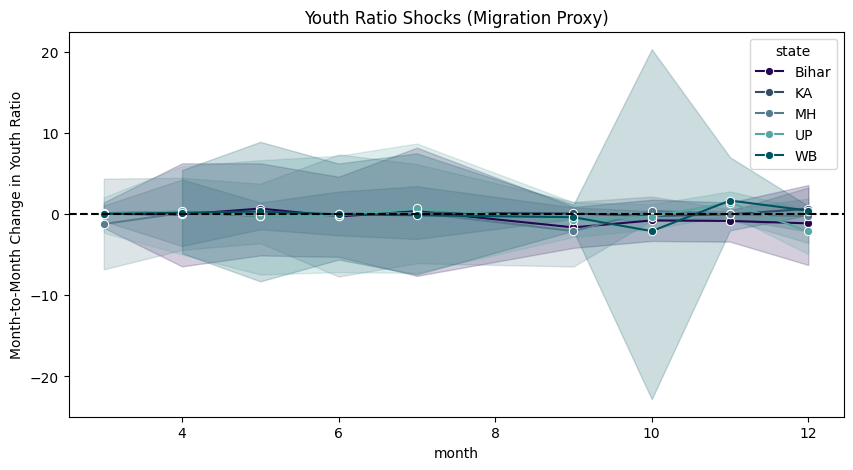

In [267]:
df_sorted = df.sort_values(['state','month'])
df_sorted['youth_ratio_delta'] = (
    df_sorted.groupby('state')['youth_ratio'].diff()
)

focus_states = ['UP', 'MH', 'Bihar', 'KA', 'WB']

temp = df_sorted[df_sorted['state'].isin(focus_states)]

plt.figure(figsize=(10,5))
sns.lineplot(
    data=temp,
    x='month',
    y='youth_ratio_delta',
    hue='state',
    marker='o',
    palette = palet +['#005461']
)

plt.axhline(0, linestyle='--', color='black')
plt.title("Youth Ratio Shocks (Migration Proxy)")
plt.ylabel("Month-to-Month Change in Youth Ratio")
plt.show()


In [268]:
df.head()

,index,state,age_0_5,age_5_17,age_18_greater,year,month,total_age,regions,youth_ratio,youth_roll_std
0,0,Meghalaya,11,61,37,2025,3,109,sisters_region,1.945946,NaN
1,1,KA,14,33,39,2025,3,86,south_region,1.205128,NaN
2,2,UP,29,82,12,2025,3,123,north_region,9.250000,NaN
3,3,UP,62,29,15,2025,3,106,north_region,6.066667,NaN
4,4,KA,14,16,21,2025,3,51,south_region,1.428571,NaN


In [269]:
df = df.drop('youth_roll_std',axis =1 )

In [270]:
df.head()

,index,state,age_0_5,age_5_17,age_18_greater,year,month,total_age,regions,youth_ratio
0,0,Meghalaya,11,61,37,2025,3,109,sisters_region,1.945946
1,1,KA,14,33,39,2025,3,86,south_region,1.205128
2,2,UP,29,82,12,2025,3,123,north_region,9.250000
3,3,UP,62,29,15,2025,3,106,north_region,6.066667
4,4,KA,14,16,21,2025,3,51,south_region,1.428571
